In [1]:
# Khai báo packages
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
sns.set_theme()

In [2]:
# Khởi tạo các DataFrame
hanoi_df = pd.read_csv('AQI Vietnam CSV/hanoi-air-quality.csv', encoding='unicode_escape')
quang_ninh_df = pd.read_csv('AQI Vietnam CSV/quang-ninh-air-quality.csv', encoding='unicode_escape')
da_nang_df = pd.read_csv('AQI Vietnam CSV/da-nang-air-quality.csv', encoding='unicode_escape')
nha_trang_df = pd.read_csv('AQI Vietnam CSV/nha-trang-air-quality.csv', encoding='unicode_escape')

In [3]:
hanoi_df.head()

,date,pm25,pm10,o3,no2,so2,co
0,2024/4/1,118,72,11,1,7,7
1,2024/4/2,103,78,11,1,8,8
2,2024/4/3,112,73,11,1,7,8
3,2024/4/4,100,60,13,1,8,2
4,2024/4/5,72,,,,,


In [4]:
hanoi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2790 non-null   object
 1    pm25   2790 non-null   object
 2    pm10   2790 non-null   object
 3    o3     2790 non-null   object
 4    no2    2790 non-null   object
 5    so2    2790 non-null   object
 6    co     2790 non-null   object
dtypes: object(7)
memory usage: 152.7+ KB


In [5]:
hanoi_df.shape
# Có thể thấy DF có 2790 rows và 7 columns

(2790, 7)

In [6]:
# Kiểm tra title các cột trong DataFrame
hanoi_df.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

## Giải thích chi tiết các chất ô nhiễm được sử dụng để phân tích

........ < Điền vô đây > ..........

In [7]:
# Có thể thấy có khoảng trắng thừa trong title cột
# Xóa tất cả các khoảng trắng trong cột
hanoi_df.columns = hanoi_df.columns.str.strip()
da_nang_df.columns = hanoi_df.columns.str.strip()
quang_ninh_df.columns = hanoi_df.columns.str.strip()
nha_trang_df.columns = hanoi_df.columns.str.strip()

In [8]:
hanoi_df.duplicated().sum()

0

In [9]:
hanoi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2790 non-null   object
 1   pm25    2790 non-null   object
 2   pm10    2790 non-null   object
 3   o3      2790 non-null   object
 4   no2     2790 non-null   object
 5   so2     2790 non-null   object
 6   co      2790 non-null   object
dtypes: object(7)
memory usage: 152.7+ KB


In [10]:
# Chuyển đổi trường "date" sang kiểu Datetime
hanoi_df['date'] = pd.to_datetime(hanoi_df['date'], format='%Y/%m/%d')

# sắp xếp dữ liệu theo thời gian
hanoi_df = hanoi_df.sort_values(by=["date"], ascending=False)
hanoi_df= hanoi_df.reset_index(drop=True)

# Chuyển đổi trường "date" sang kiểu Datetime
da_nang_df['date'] = pd.to_datetime(da_nang_df['date'], format='%Y/%m/%d')

# sắp xếp dữ liệu theo thời gian
da_nang_df = da_nang_df.sort_values(by=["date"], ascending=False)
da_nang_df= da_nang_df.reset_index(drop=True)

# Chuyển đổi trường "date" sang kiểu Datetime
quang_ninh_df['date'] = pd.to_datetime(quang_ninh_df['date'], format='%Y/%m/%d')

# sắp xếp dữ liệu theo thời gian
quang_ninh_df = quang_ninh_df.sort_values(by=["date"], ascending=False)
quang_ninh_df= quang_ninh_df.reset_index(drop=True)

# Chuyển đổi trường "date" sang kiểu Datetime
nha_trang_df['date'] = pd.to_datetime(nha_trang_df['date'], format='%Y/%m/%d')

# sắp xếp dữ liệu theo thời gian
nha_trang_df = nha_trang_df.sort_values(by=["date"], ascending=False)
nha_trang_df= nha_trang_df.reset_index(drop=True)

In [11]:
# Các chỉ số trên là giá trị avg(trung bình) được đo từ các trạm trong khu vực -> Có kiểu Int
# Chuyển đổi các cột chất ô nhiễm sang kiểu Int (["pm25", "pm10", "o3", "no2", "so2", "co"])
columns_to_convert = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Chuyển kiểu các chỉ số không khí sang 'int'
for col in columns_to_convert:
    hanoi_df[col] = pd.to_numeric(hanoi_df[col], errors='coerce').astype('Float64')
    da_nang_df[col] = pd.to_numeric(da_nang_df[col], errors='coerce').astype('Float64')
    quang_ninh_df[col] = pd.to_numeric(quang_ninh_df[col], errors='coerce').astype('Float64')
    nha_trang_df[col] = pd.to_numeric(nha_trang_df[col], errors='coerce').astype('Float64')

In [12]:
hanoi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2790 non-null   datetime64[ns]
 1   pm25    2539 non-null   Float64       
 2   pm10    2534 non-null   Float64       
 3   o3      2319 non-null   Float64       
 4   no2     2370 non-null   Float64       
 5   so2     2381 non-null   Float64       
 6   co      2265 non-null   Float64       
dtypes: Float64(6), datetime64[ns](1)
memory usage: 169.1 KB


In [13]:
hanoi_df.describe()

,date,pm25,pm10,o3,no2,so2,co
count,2790,2539.0,2534.0,2319.0,2370.0,2381.0,2265.0
mean,2019-09-25 17:59:13.548387072,72.589602,38.522494,18.530401,19.324051,12.805964,12.068874
min,2014-01-01 00:00:00,2.0,1.0,1.0,1.0,1.0,1.0
25%,2017-04-10 06:00:00,36.5,21.0,8.0,12.0,7.0,6.0
50%,2020-04-23 12:00:00,65.0,36.0,14.0,18.0,12.0,9.0
75%,2022-03-24 18:00:00,103.0,53.0,21.0,26.0,17.0,14.0
max,2024-04-05 00:00:00,299.0,187.0,498.0,75.0,52.0,102.0
std,NaN,44.026213,22.603923,24.278472,10.103749,7.877325,10.117448


In [14]:
da_nang_df.describe()

,date,pm25,pm10,o3,no2,so2,co
count,3090,1840.0,1838.0,2290.0,2574.0,2024.0,1777.0
mean,2019-05-04 11:06:52.427184896,42.134239,18.791621,65.651965,11.716006,20.625988,6.235228
min,2014-01-01 00:00:00,1.0,1.0,3.0,1.0,1.0,1.0
25%,2016-06-16 12:00:00,20.0,9.0,22.0,10.0,7.0,2.0
50%,2019-09-27 12:00:00,35.0,15.0,35.0,11.0,13.0,4.0
75%,2022-01-21 18:00:00,58.0,24.0,66.0,15.0,16.0,9.0
max,2024-04-03 00:00:00,451.0,448.0,500.0,50.0,156.0,49.0
std,NaN,31.113309,20.806038,87.899854,5.598061,28.020188,5.309862


In [15]:
quang_ninh_df.describe()

,date,pm25,pm10,o3,no2,so2,co
count,2017,982.0,991.0,1877.0,1631.0,305.0,186.0
mean,2021-01-08 04:46:17.193852160,46.503055,25.398587,19.5626,11.139178,171.809836,33.064516
min,2014-08-02 00:00:00,5.0,3.0,1.0,1.0,4.0,6.0
25%,2019-12-22 00:00:00,23.0,13.0,8.0,1.0,18.0,24.0
50%,2021-06-15 00:00:00,40.0,21.0,14.0,10.0,22.0,27.0
75%,2022-11-03 00:00:00,60.0,33.0,23.0,17.0,500.0,30.0
max,2024-04-05 00:00:00,164.0,89.0,268.0,119.0,500.0,98.0
std,NaN,30.970729,16.591453,20.677361,11.090188,224.53476,22.274361


In [16]:
nha_trang_df.describe()

,date,pm25,pm10,o3,no2,so2,co
count,2366,1388.0,1388.0,1856.0,1827.0,2046.0,2248.0
mean,2019-08-23 02:51:01.369399808,35.881844,16.95245,32.91056,5.527094,8.563539,4.869662
min,2014-01-01 00:00:00,3.0,1.0,1.0,1.0,1.0,1.0
25%,2016-01-14 18:00:00,17.0,9.0,6.0,2.0,4.0,3.0
50%,2020-09-30 12:00:00,29.0,14.0,24.0,4.0,6.0,4.0
75%,2022-06-17 18:00:00,50.0,21.0,51.0,7.0,12.0,6.0
max,2024-04-05 00:00:00,360.0,339.0,431.0,155.0,42.0,25.0
std,NaN,26.47226,18.062793,32.671056,6.040454,5.797784,3.119687


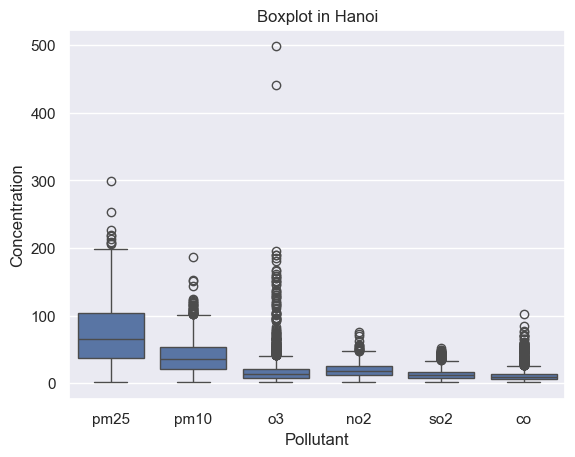

In [17]:
df_melted = pd.melt(hanoi_df, value_vars=['pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], var_name='Pollutant', value_name='Concentration')

# Tạo boxplot
sns.boxplot(x='Pollutant', y='Concentration', data=df_melted)

# Thêm nhãn và tiêu đề
plt.xlabel("Pollutant")
plt.ylabel("Concentration")
plt.title("Boxplot in Hanoi")

# Hiển thị biểu đồ
plt.show()

In [18]:
hanoi_df.isnull().sum()

date      0
pm25    251
pm10    256
o3      471
no2     420
so2     409
co      525
dtype: int64

In [19]:
quang_ninh_df.isnull().sum()

date       0
pm25    1035
pm10    1026
o3       140
no2      386
so2     1712
co      1831
dtype: int64

In [20]:
da_nang_df.isnull().sum()

date       0
pm25    1250
pm10    1252
o3       800
no2      516
so2     1066
co      1313
dtype: int64

In [21]:
nha_trang_df.isnull().sum()

date      0
pm25    978
pm10    978
o3      510
no2     539
so2     320
co      118
dtype: int64

In [22]:
def missing_data__percent(df, name):
    # Tính toán tổng số giá trị null và tỷ lệ phần trăm giá trị null cho mỗi cột
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    # Vẽ biểu đồ
    plt.figure(figsize=(15, 6))
    ax = sns.barplot(x=missing_data.index, y=missing_data['Percent'])

    # Thêm giá trị trục y lên đầu mỗi cột x
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), f"{p.get_height():.2f}%", ha='center', va='bottom')

    # Định dạng và chú thích biểu đồ
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title(f'Percent missing data by feature in {name}', fontsize=15)
    plt.xticks(rotation=45)  # Đảo các nhãn trục x để tránh chồng chéo
    plt.tight_layout()  # Tăng khoảng cách giữa các phần tử để tránh trùng lắp
    plt.show()

    # Hiển thị số lượng và phần trăm giá trị null cho các cột đầu tiên
    missing_data.head()


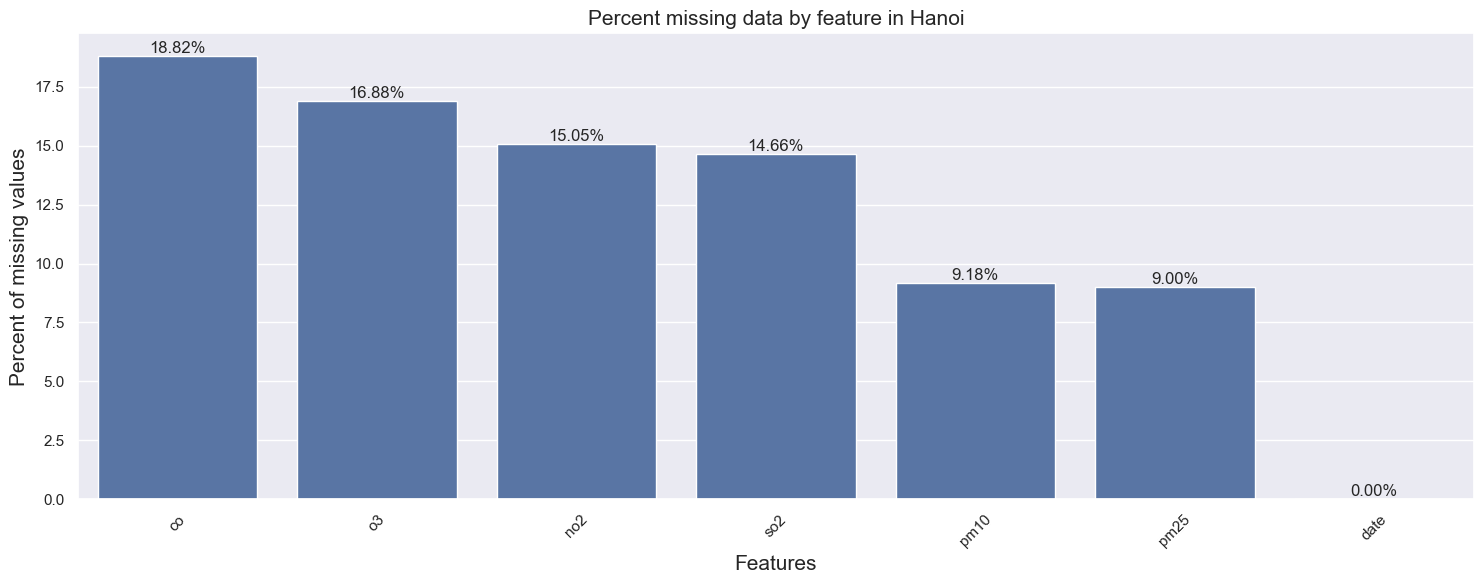

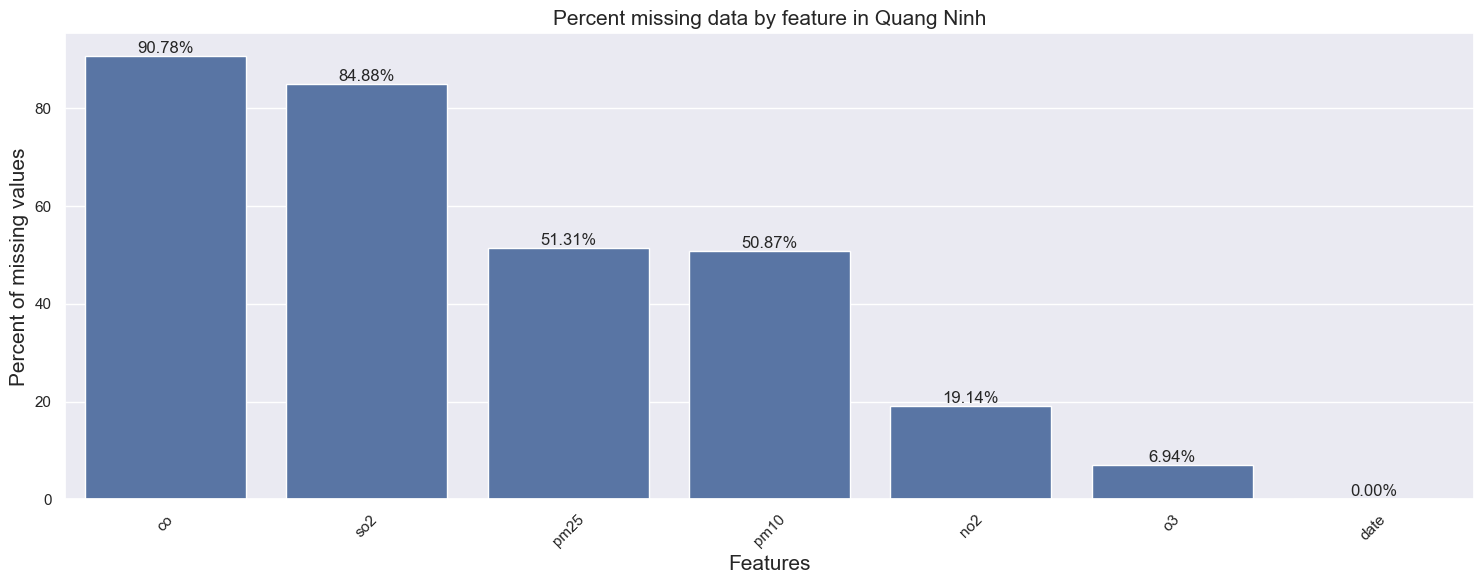

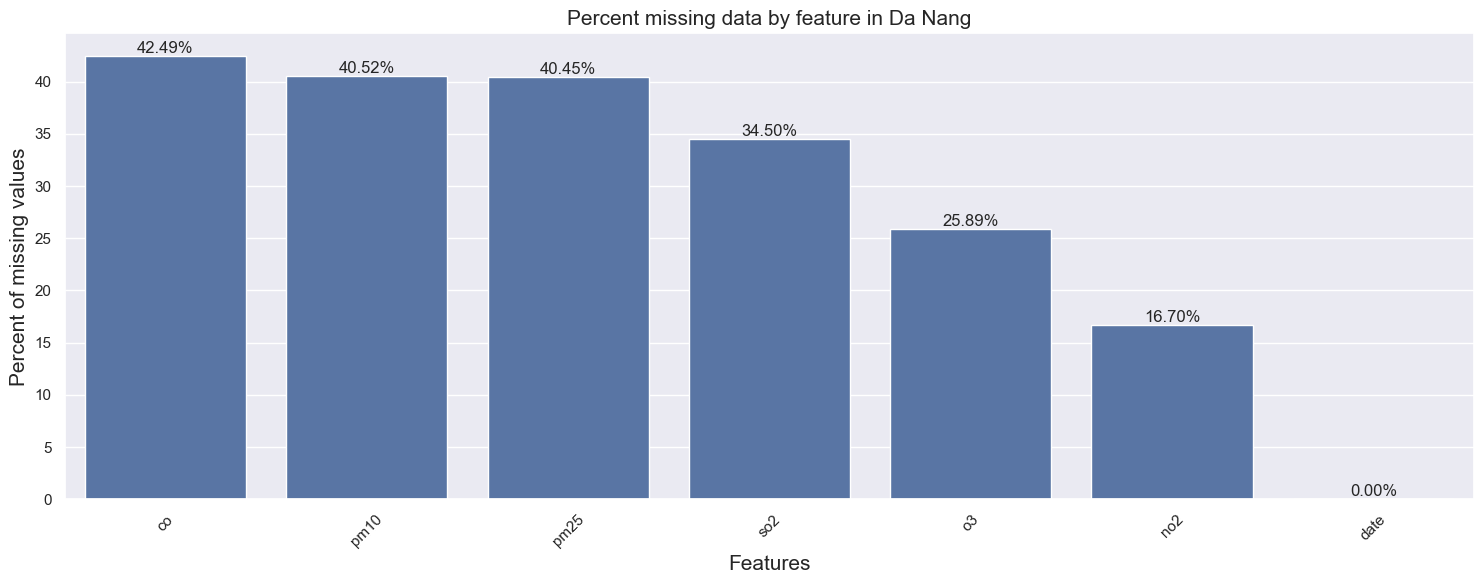

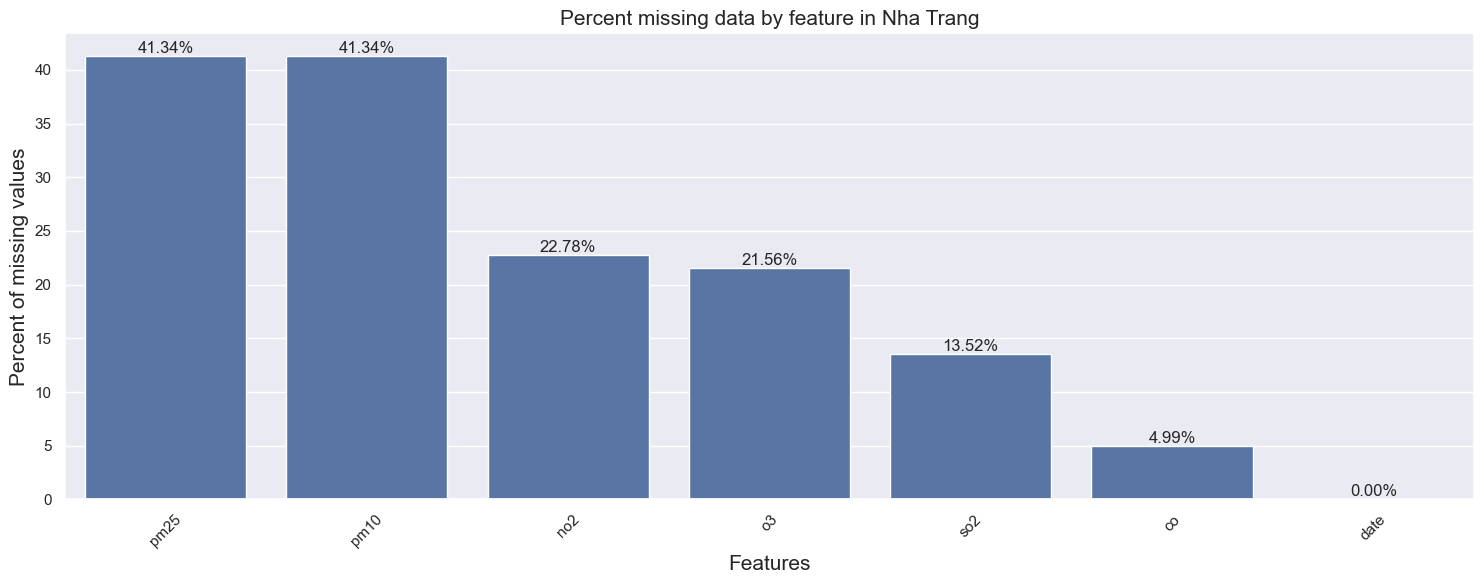

In [23]:
missing_data__percent(hanoi_df, "Hanoi")
missing_data__percent(quang_ninh_df, "Quang Ninh")
missing_data__percent(da_nang_df, "Da Nang")
missing_data__percent(nha_trang_df, "Nha Trang")

In [24]:
def histogram_pollutant(df, name):
    for col in df.columns:
        if df[col].dtype == 'Float64':
            sns.histplot(df[col], kde=True, bins=25)
            plt.title(f"Histogram of {col} in {name}")
            plt.ylabel("Frequency")
            plt.xlabel("AQI of pollutants")
            plt.show()

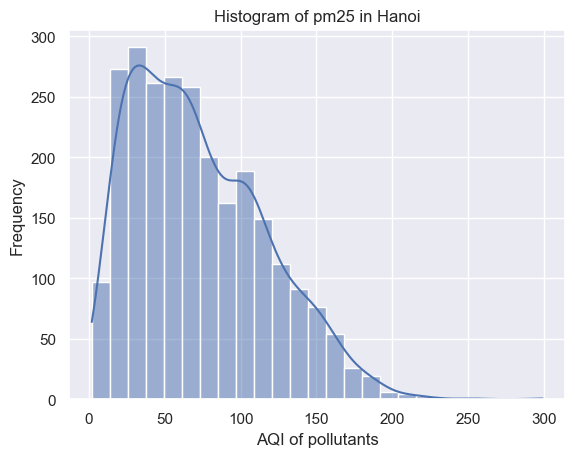

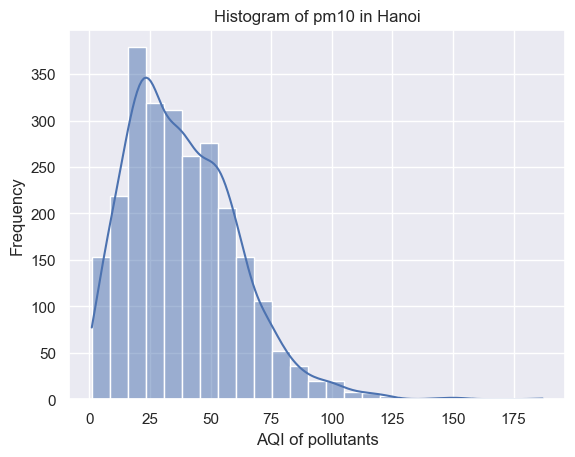

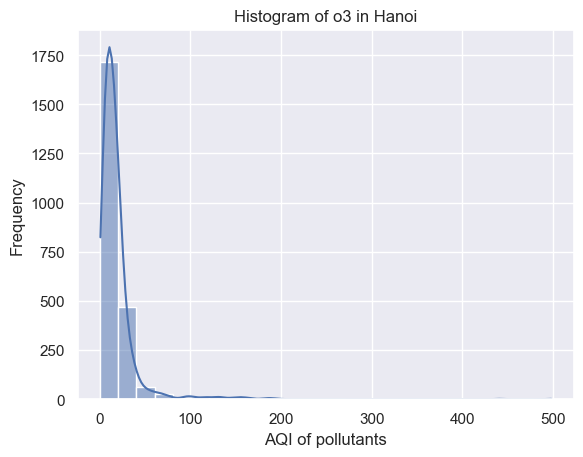

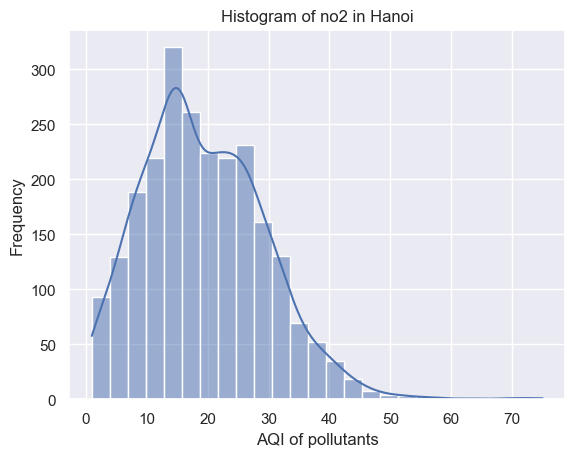

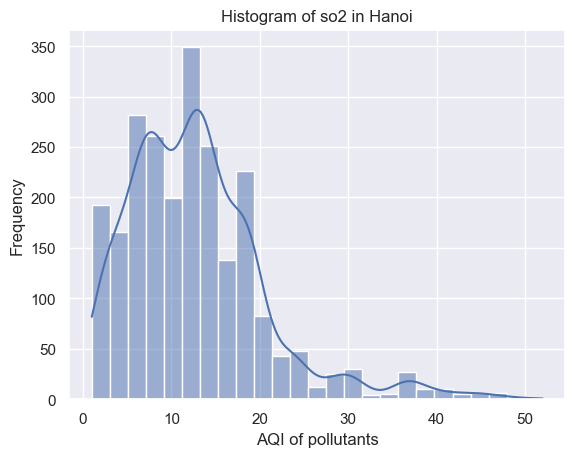

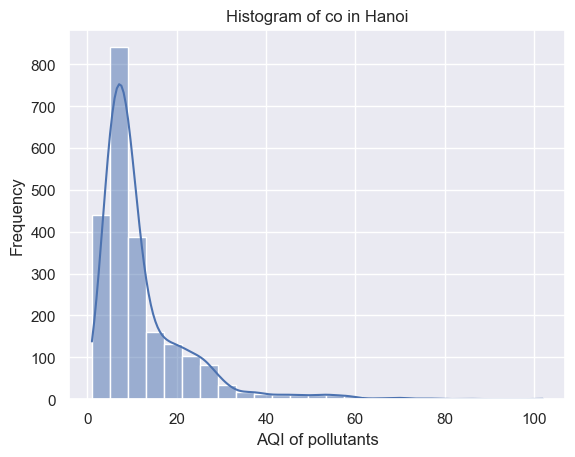

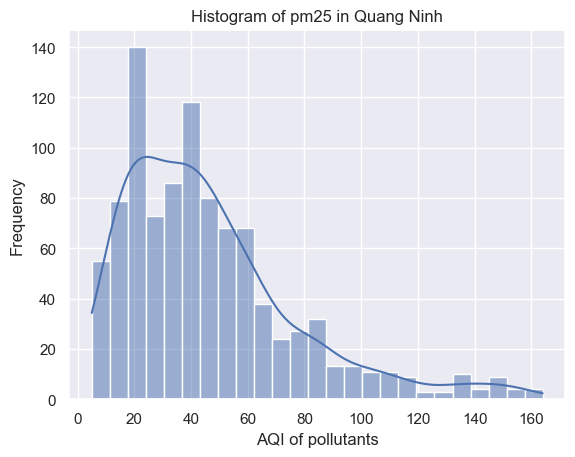

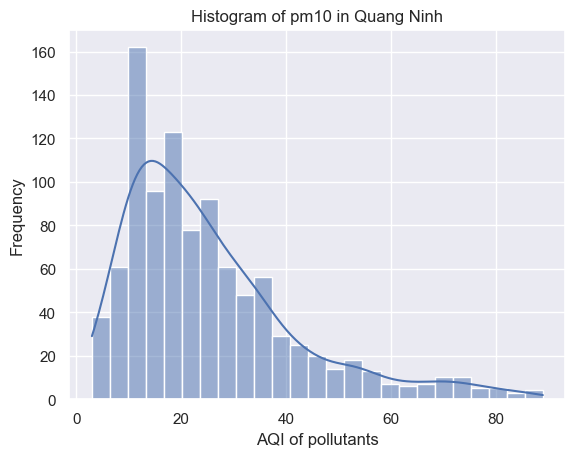

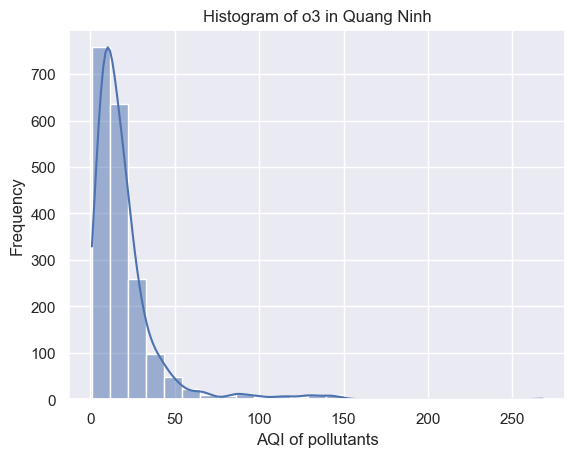

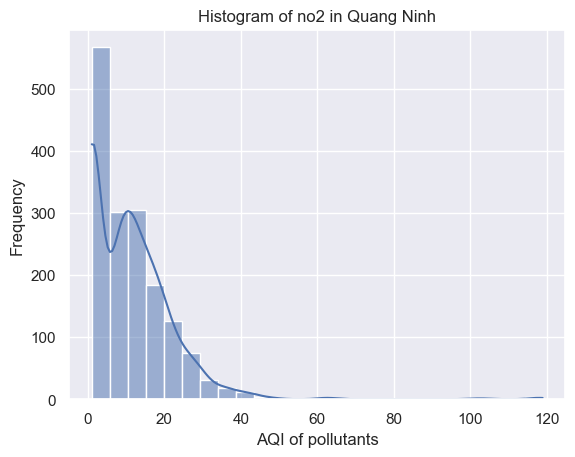

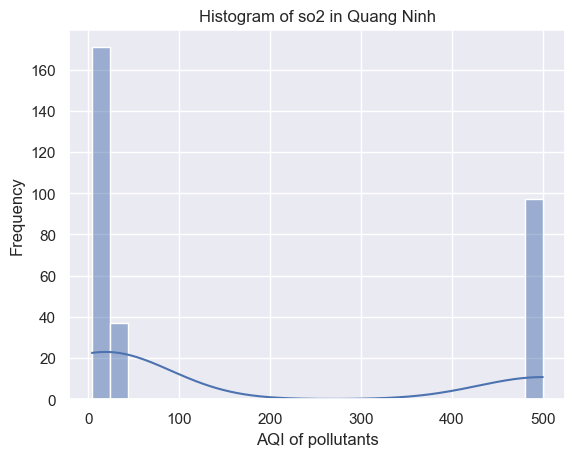

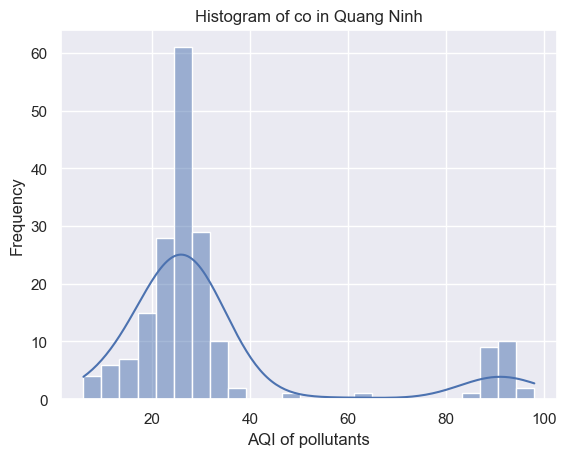

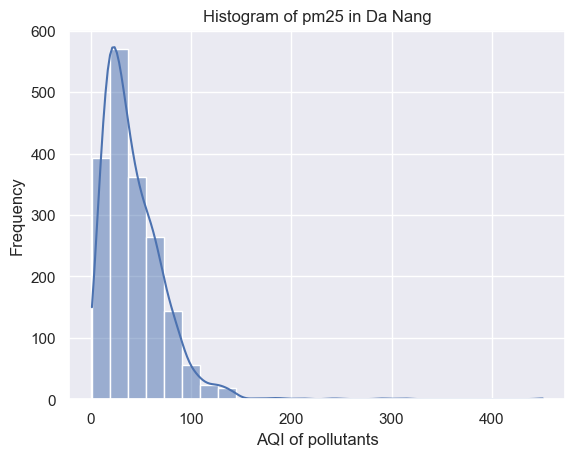

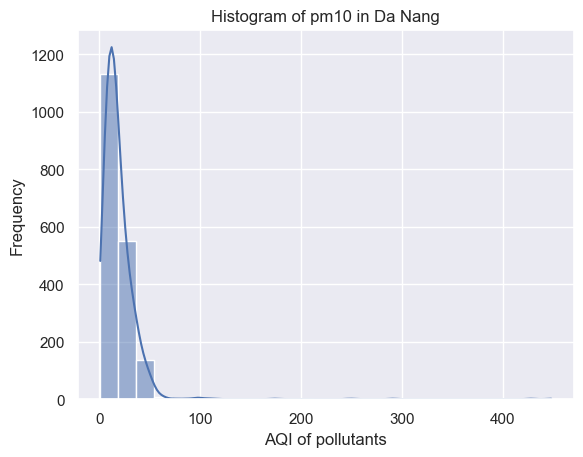

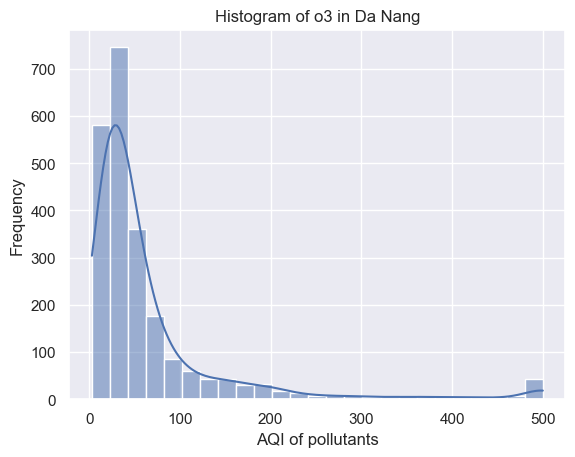

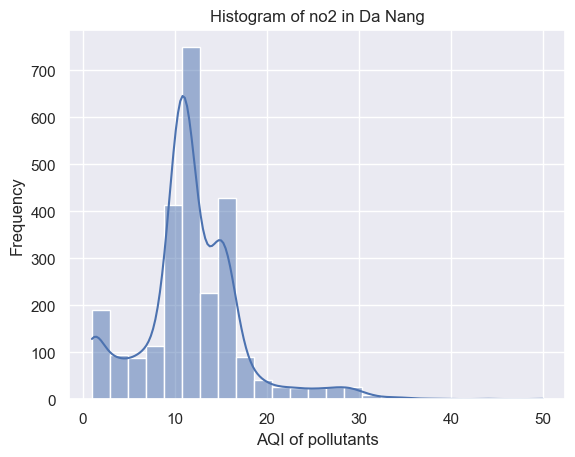

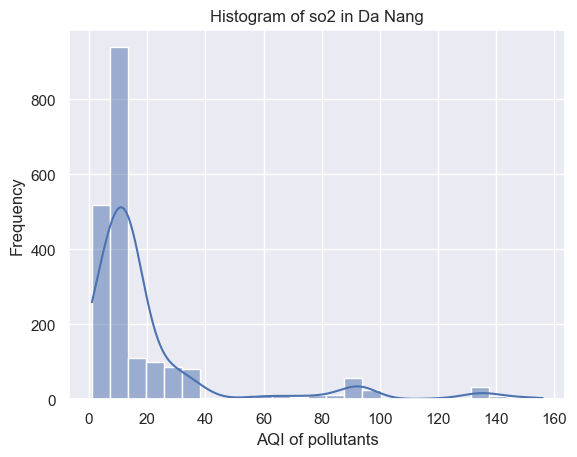

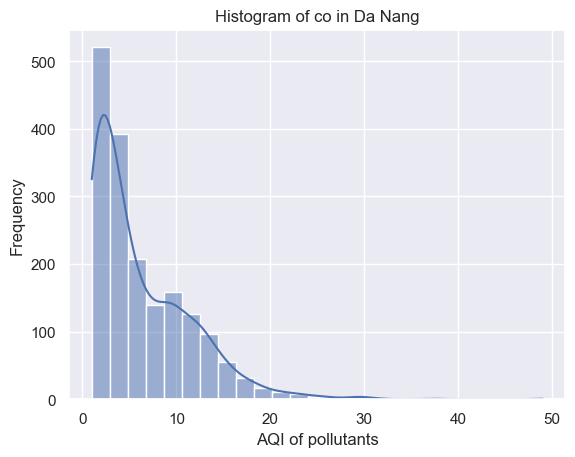

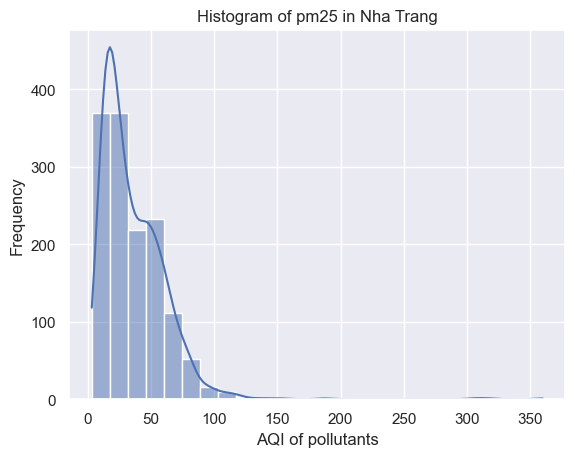

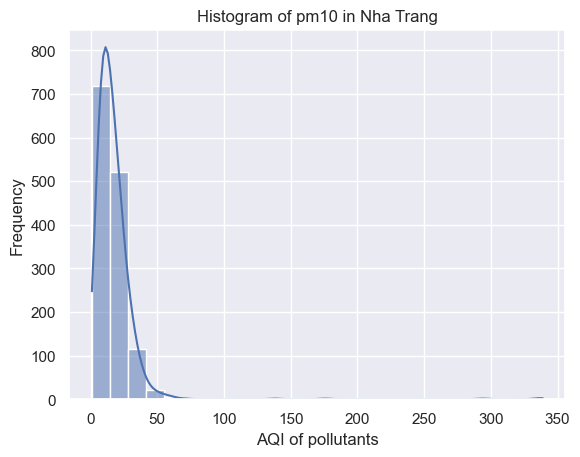

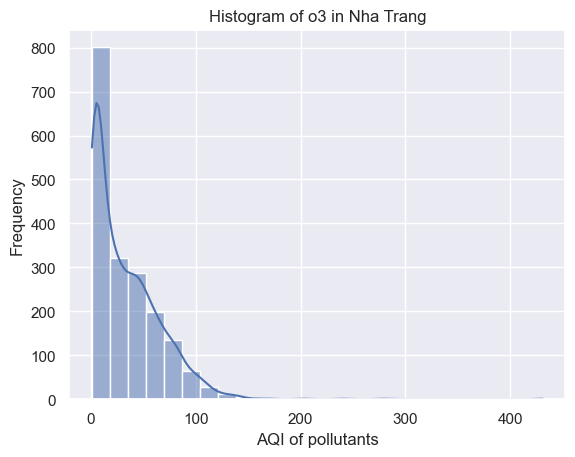

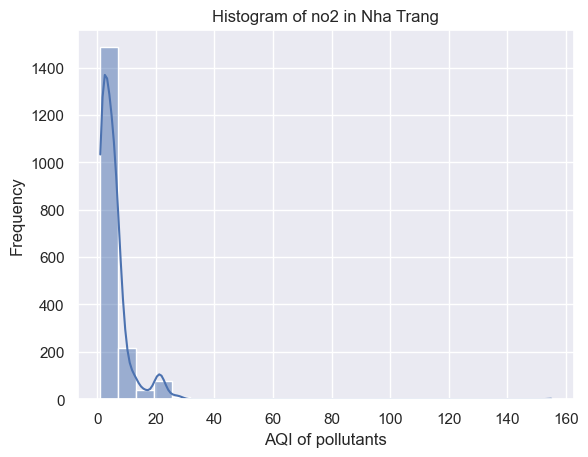

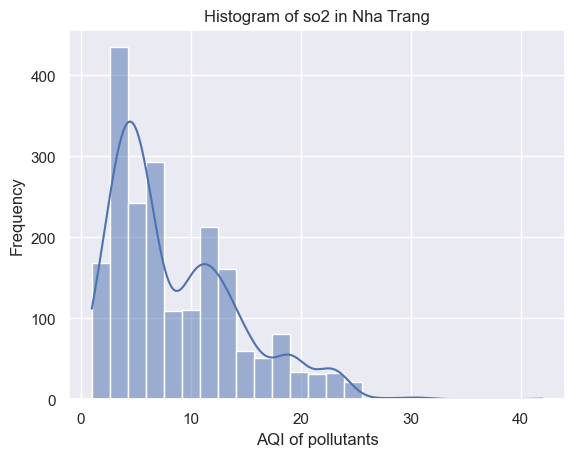

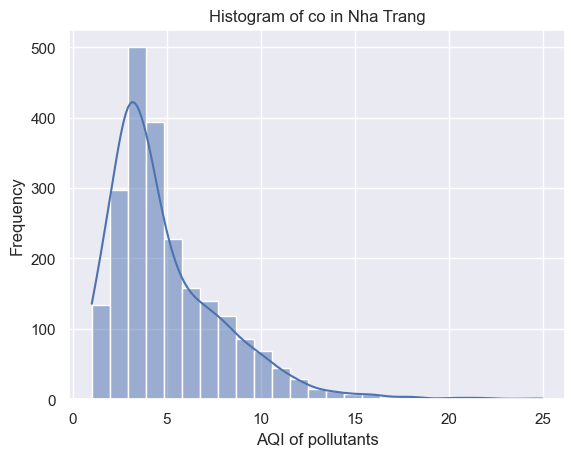

In [25]:
histogram_pollutant(hanoi_df, "Hanoi")
histogram_pollutant(quang_ninh_df, "Quang Ninh")
histogram_pollutant(da_nang_df, "Da Nang")
histogram_pollutant(nha_trang_df, "Nha Trang")

In [26]:
# Ta thấy có các giá trị Null trong DataFrame

# Sử dụng giá trị trung vị (median):
# Dữ liệu có phân phối không đối xứng hoặc nhiều giá trị ngoại lệ: 
#   Trong trường hợp dữ liệu có phân phối không đối xứng hoặc có nhiều giá trị ngoại lệ, việc sử dụng giá trị trung vị có thể là một lựa chọn tốt hơn. Giá trị trung vị không bị ảnh hưởng bởi giá trị ngoại lệ và cho phản ánh tốt hơn về điểm trung tâm của dữ liệu.
# Khi muốn đánh giá tính ổn định của trung tâm dữ liệu: Giá trị trung vị thường ít nhạy cảm hơn với các biến động trong dữ liệu so với giá trị trung bình.

# Giá trị median
median_values = hanoi_df.median()
# Gắn giá trị trung vị cho các giá trị null trong từng cột
hanoi_df.fillna(median_values, inplace=True)

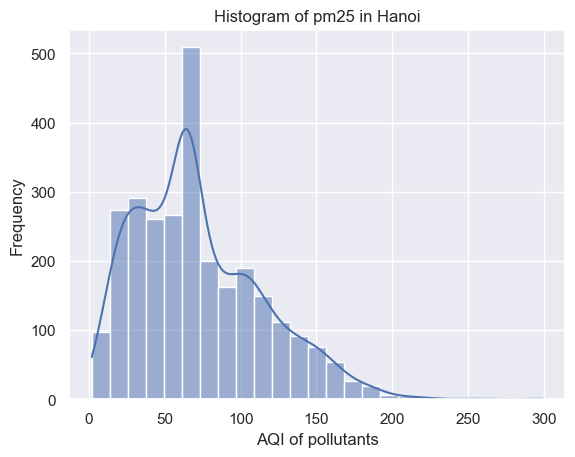

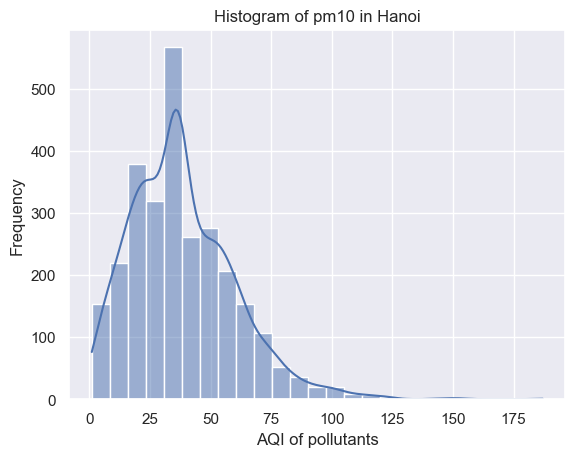

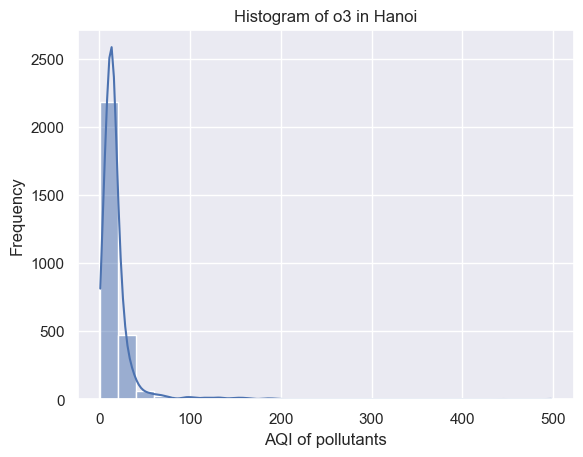

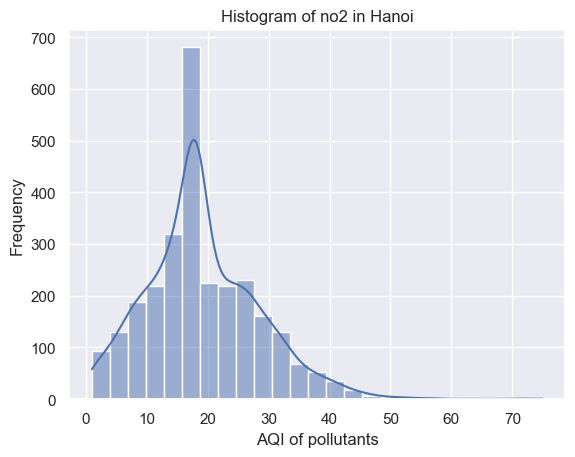

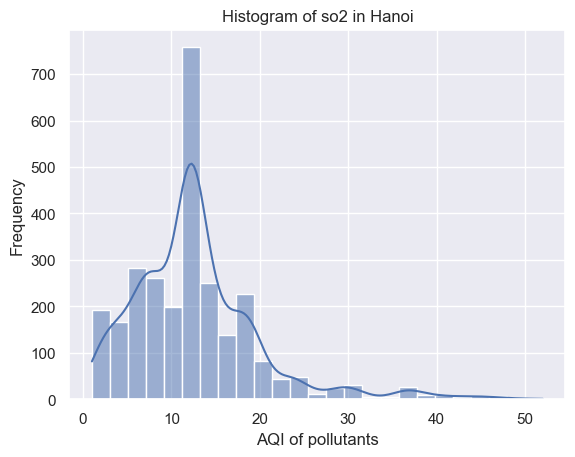

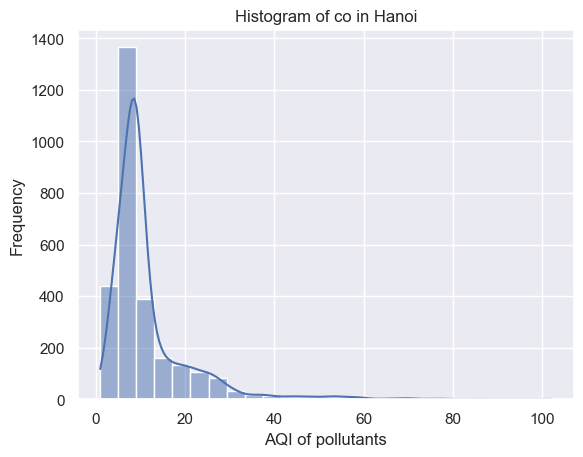

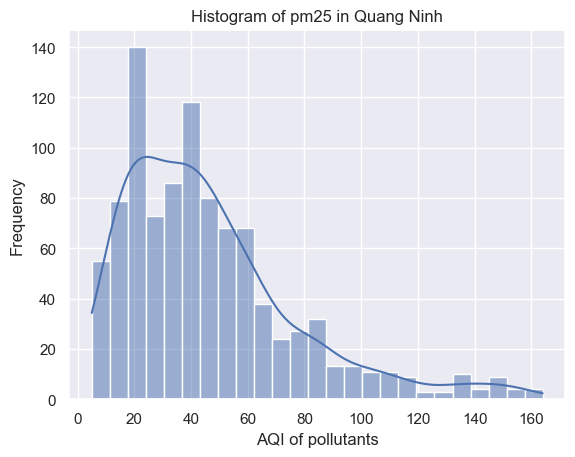

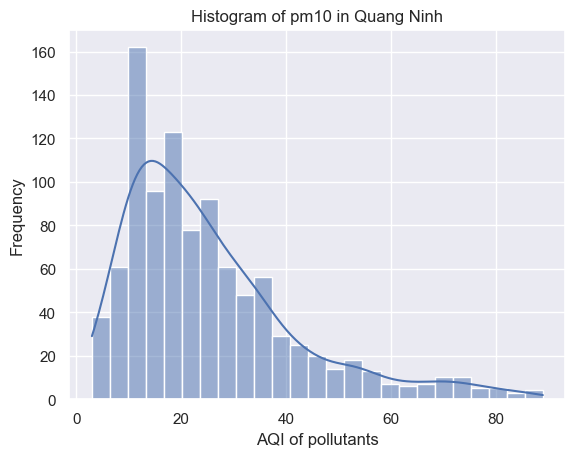

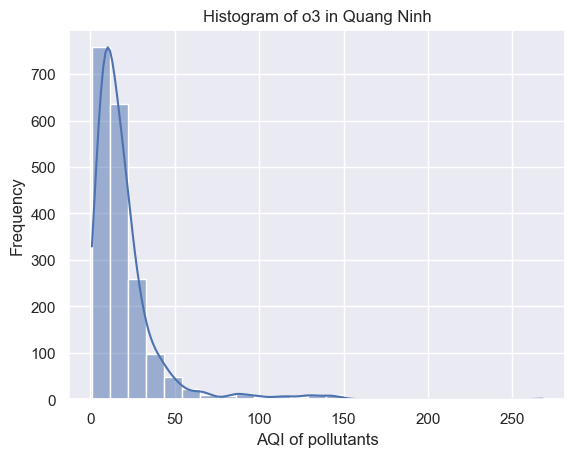

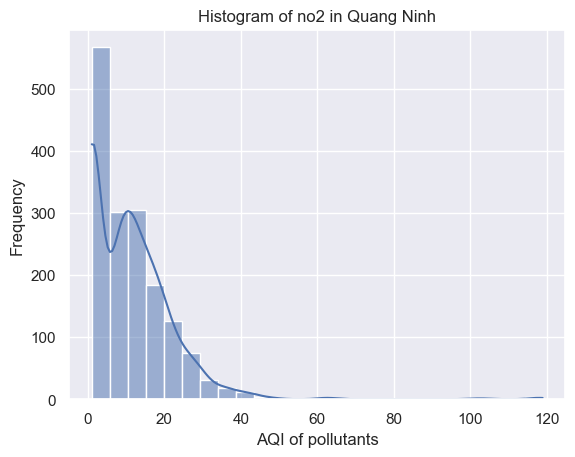

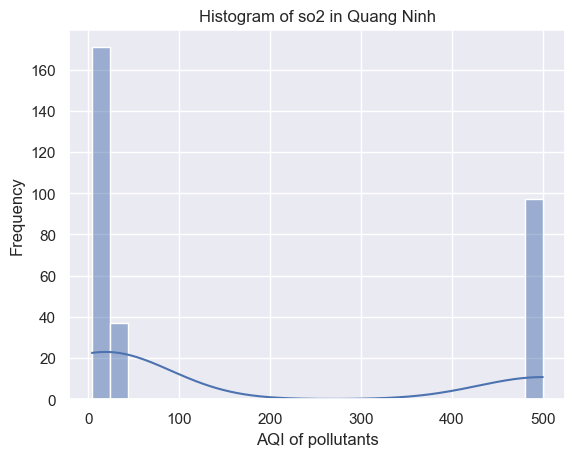

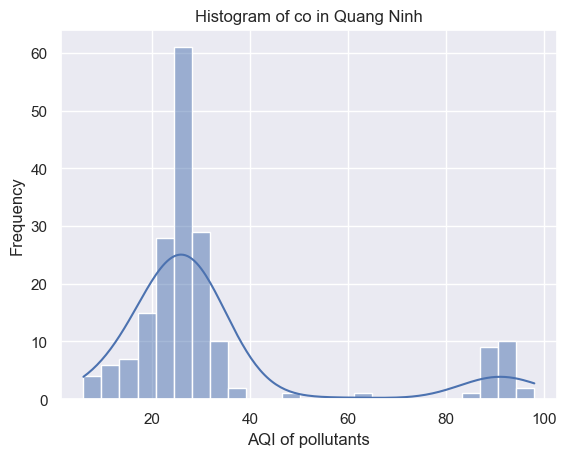

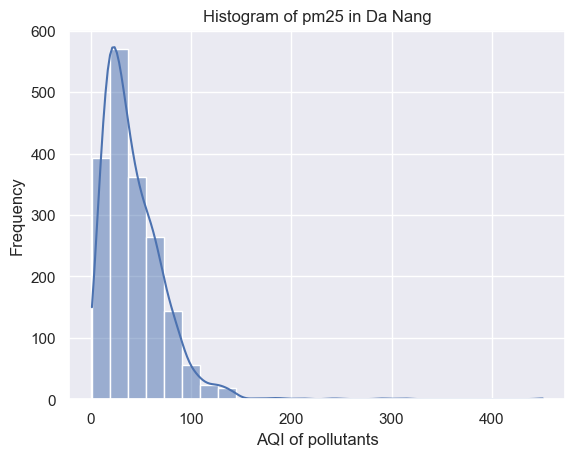

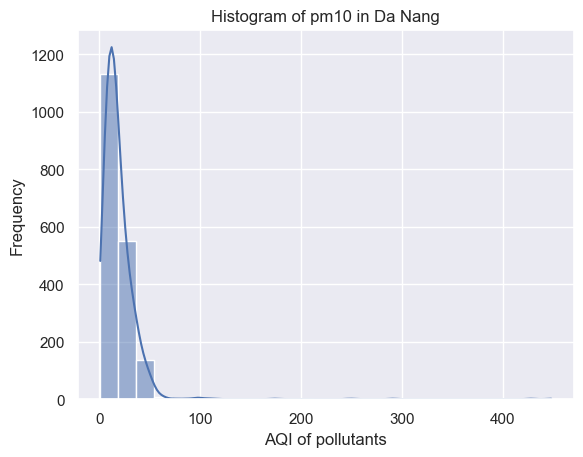

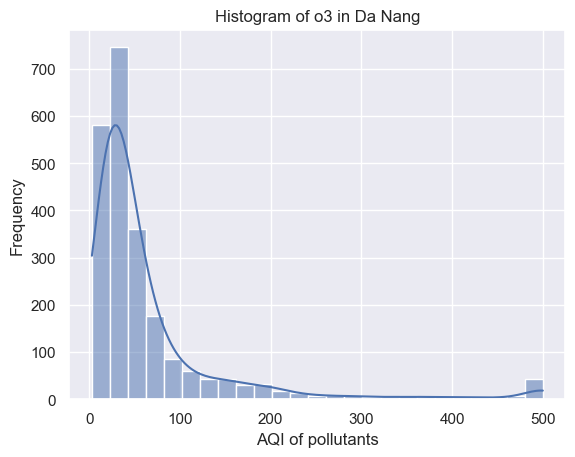

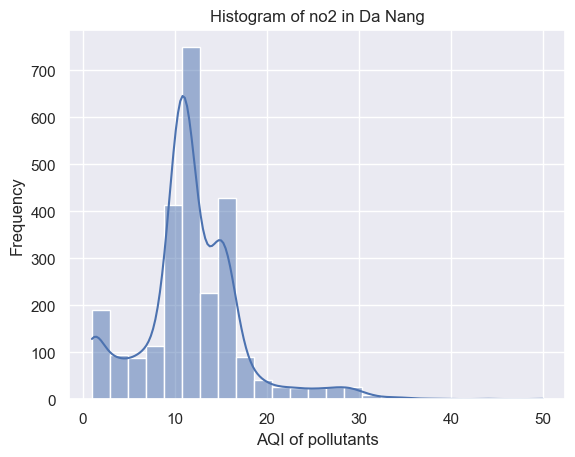

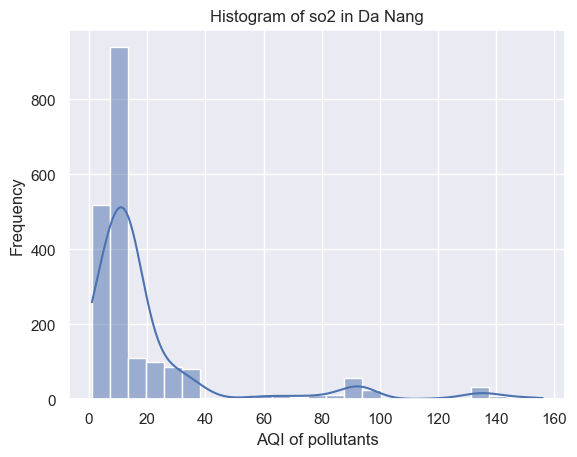

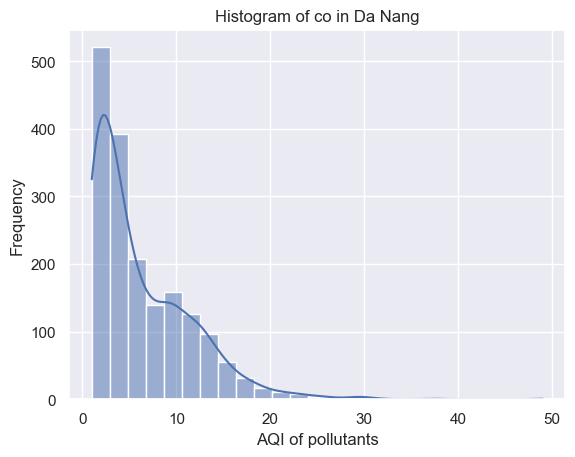

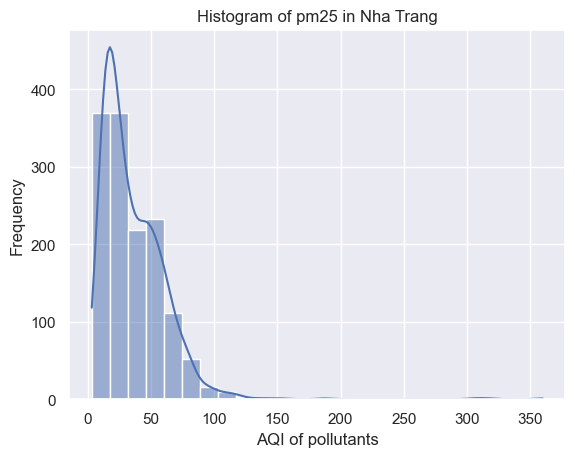

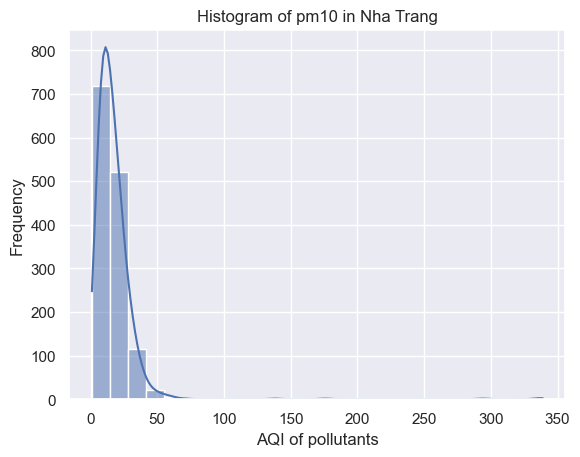

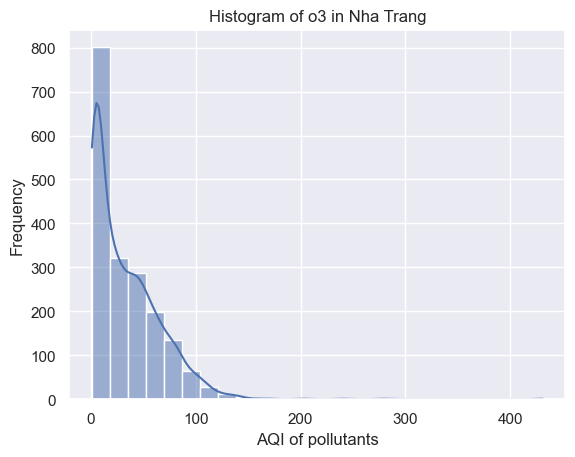

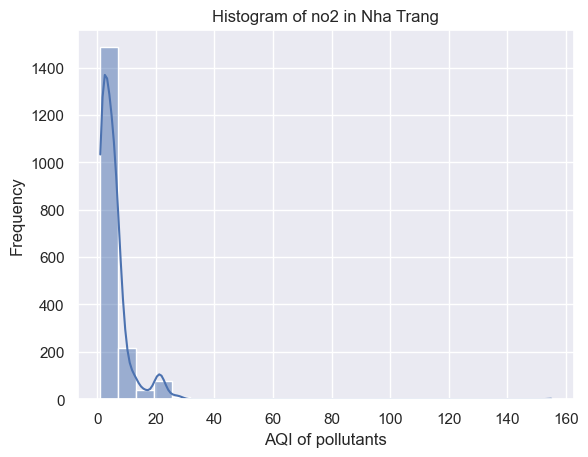

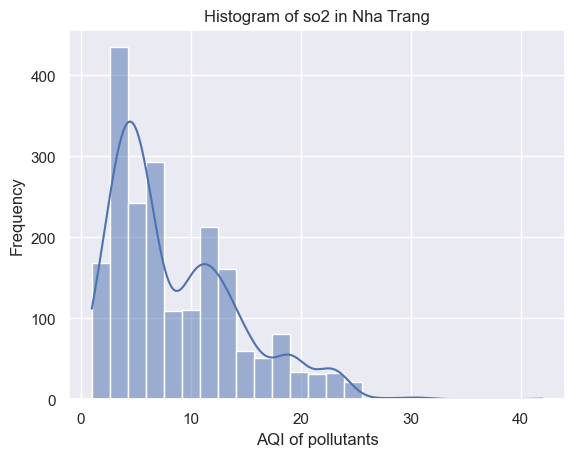

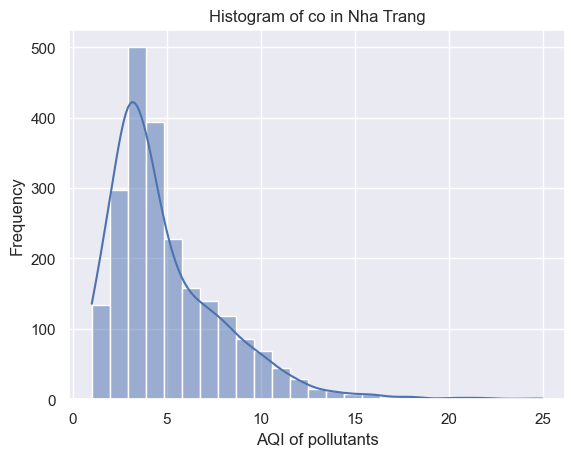

In [27]:
histogram_pollutant(hanoi_df, "Hanoi")
histogram_pollutant(quang_ninh_df, "Quang Ninh")
histogram_pollutant(da_nang_df, "Da Nang")
histogram_pollutant(nha_trang_df, "Nha Trang")

In [28]:
hanoi_df.isnull().sum()

date    0
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
dtype: int64

In [29]:
# ....
hanoi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2790 non-null   datetime64[ns]
 1   pm25    2790 non-null   Float64       
 2   pm10    2790 non-null   Float64       
 3   o3      2790 non-null   Float64       
 4   no2     2790 non-null   Float64       
 5   so2     2790 non-null   Float64       
 6   co      2790 non-null   Float64       
dtypes: Float64(6), datetime64[ns](1)
memory usage: 169.1 KB


In [30]:
# ....
hanoi_df.describe()

,date,pm25,pm10,o3,no2,so2,co
count,2790,2790.0,2790.0,2790.0,2790.0,2790.0,2790.0
mean,2019-09-25 17:59:13.548387072,71.90681,38.291039,17.765591,19.124731,12.687814,11.491398
min,2014-01-01 00:00:00,2.0,1.0,1.0,1.0,1.0,1.0
25%,2017-04-10 06:00:00,39.0,23.0,9.0,13.0,8.0,7.0
50%,2020-04-23 12:00:00,65.0,36.0,14.0,18.0,12.0,9.0
75%,2022-03-24 18:00:00,99.0,51.0,19.0,25.0,15.0,12.0
max,2024-04-05 00:00:00,299.0,187.0,498.0,75.0,52.0,102.0
std,NaN,42.05454,21.553869,22.198675,9.323988,7.282426,9.194198


In [31]:
# Dựa vào quy trình xử lý dữ liệu giống DF: hanoi_df
# Tạo hàm cleaning DataFrame
def clean_df(df):
    df.columns = df.columns.str.strip()
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    # sắp xếp dữ liệu theo thời gian
    df = df.sort_values(by=["date"], ascending=False)
    df= df.reset_index(drop=True)

    # Kiểu dữ liệu của cột 'pm25' và các chỉ số đo chất lượng không khí phải là kiểu số nguyên
    columns_to_convert = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

    # Chuyển kiểu các chỉ số không khí sang 'int'
    for col in columns_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Float64')

    # Giá trị mean
    mean_values = df.median()
    # Gắn giá trị trung bình cho các giá trị null trong từng cột
    df.fillna(mean_values, inplace=True)

    return df

In [32]:
# Cleaning DataFrames
quang_ninh_df = clean_df(quang_ninh_df)
da_nang_df = clean_df(da_nang_df)
nha_trang_df = clean_df(nha_trang_df)

In [33]:
# Tạo hàm biểu diễn mối tương quan giữa các chất ô nhiễm
def show_corr(df, name):
    # Loại bỏ cột 'date' khỏi DataFrame
    df_toxic_sub = df.drop(columns=['date'])
    # Tính toán ma trận tương quan
    correlation_matrix = df_toxic_sub.corr()
    plt.figure(figsize=(10, 8))
    # Biểu diễn mối tương quan bằng heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Ma trận tương quan của AQI tại {name}")
    plt.show()

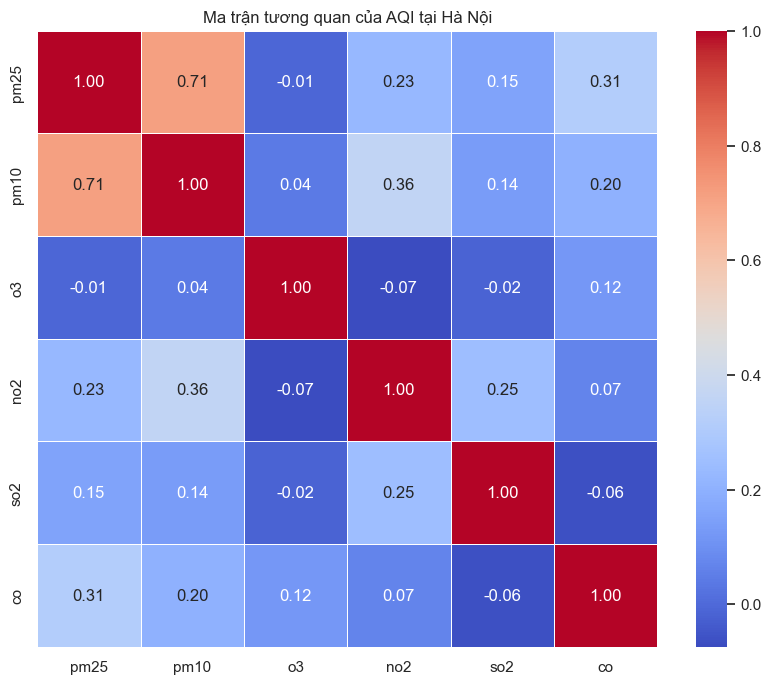

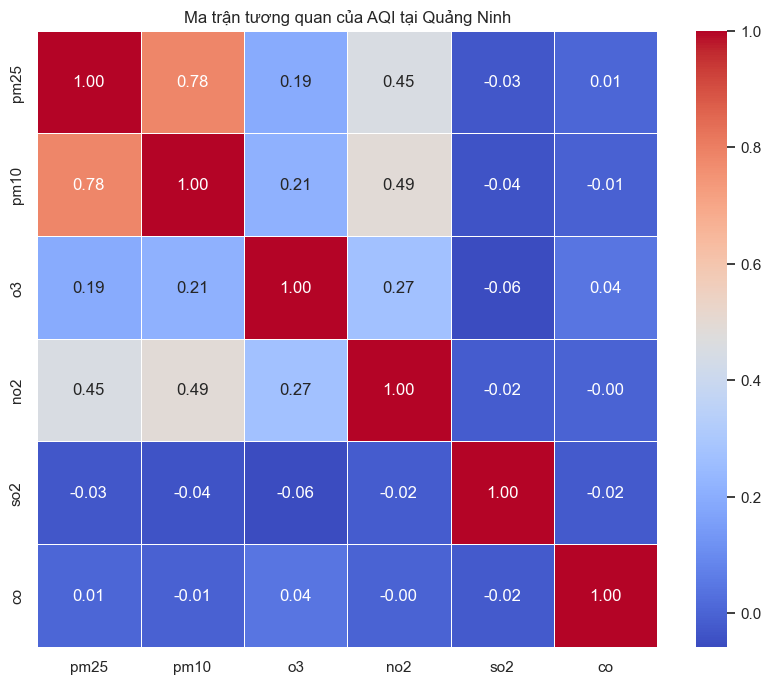

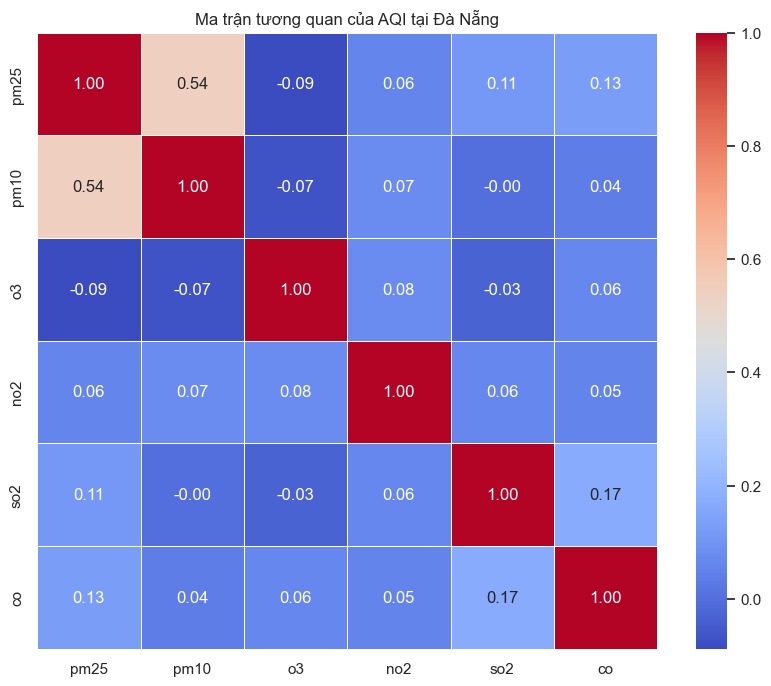

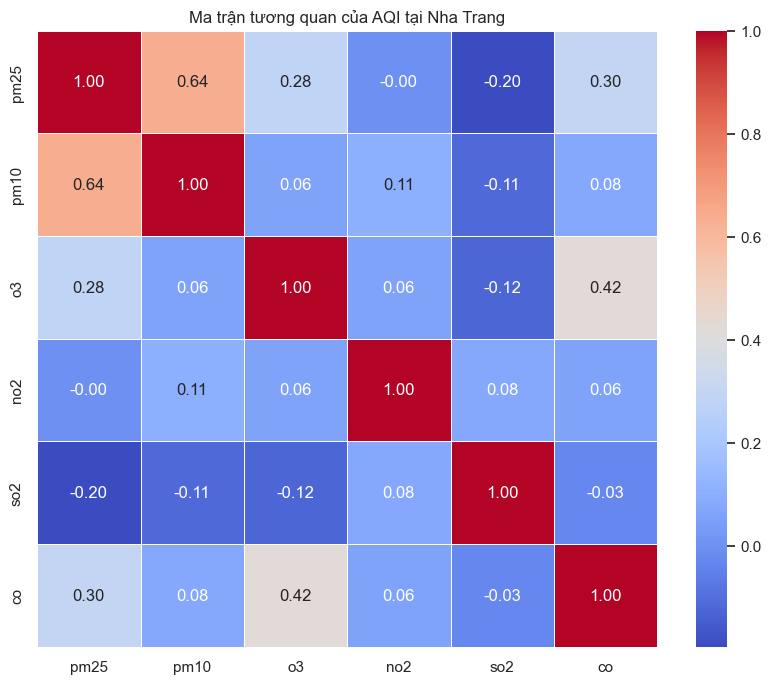

In [34]:
# Phân tích các mối tương quan này
# ....

show_corr(hanoi_df, "Hà Nội")
show_corr(quang_ninh_df, "Quảng Ninh")
show_corr(da_nang_df, "Đà Nẵng")
show_corr(nha_trang_df, "Nha Trang")

In [35]:
# Tạo hàm phân loại chất lượng ô nhiễm và chỉ số AQI
def aqi_classification(df):
    # Tính toán cột 'aqi' là giá trị lớn nhất của các chất độc hại
    df['aqi'] = df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].max(axis=1)

    # Xây dựng hàm để xác định loại AQI dựa trên giá trị aqi
    def categorize_aqi(aqi):
        if aqi <= 50:
            return 'Good' # Tốt
        elif 51 <= aqi <= 100:
            return 'Moderate' # Trung bình
        elif 101 <= aqi <= 150:
            return 'Unhealthy for Sensitive Groups' # Không tốt cho các nhóm nhạy cảm
        elif 151 <= aqi <= 500:
            return 'Unhealthy and Above' # Không lành mạnh trở lên
        
        # elif 151 <= aqi <= 200:
        #     return 'Unhealthy' # Không tốt cho sức khỏe
        # elif 201 <= aqi <= 300:
        #     return 'Very Unhealthy' # Rất không tốt cho sức khỏe
        # else:
        #     return 'Hazardous' # Nguy hiểm

    # Áp dụng hàm để tạo cột 'AQI Category'
    df['AQI Category'] = df['aqi'].apply(categorize_aqi)

    return df

In [36]:
hanoi_df = aqi_classification(hanoi_df)
quang_ninh_df = aqi_classification(quang_ninh_df)
da_nang_df = aqi_classification(da_nang_df)
nha_trang_df = aqi_classification(nha_trang_df)

In [37]:
hanoi_df.head()

,date,pm25,pm10,o3,no2,so2,co,aqi,AQI Category
0,2024-04-05,72.0,36.0,14.0,18.0,12.0,9.0,72.0,Moderate
1,2024-04-04,100.0,60.0,13.0,1.0,8.0,2.0,100.0,Moderate
2,2024-04-03,112.0,73.0,11.0,1.0,7.0,8.0,112.0,Unhealthy for Sensitive Groups
3,2024-04-02,103.0,78.0,11.0,1.0,8.0,8.0,103.0,Unhealthy for Sensitive Groups
4,2024-04-01,118.0,72.0,11.0,1.0,7.0,7.0,118.0,Unhealthy for Sensitive Groups


In [38]:
hanoi_df['AQI Category'].value_counts()

AQI Category
Moderate                          1174
Good                               899
Unhealthy for Sensitive Groups     550
Unhealthy and Above                167
Name: count, dtype: int64

In [39]:
hanoi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2790 non-null   datetime64[ns]
 1   pm25          2790 non-null   Float64       
 2   pm10          2790 non-null   Float64       
 3   o3            2790 non-null   Float64       
 4   no2           2790 non-null   Float64       
 5   so2           2790 non-null   Float64       
 6   co            2790 non-null   Float64       
 7   aqi           2790 non-null   Float64       
 8   AQI Category  2790 non-null   object        
dtypes: Float64(7), datetime64[ns](1), object(1)
memory usage: 215.4+ KB


In [40]:
hanoi_df['AQI Category'].nbytes

22320

In [41]:
# Chuyển đổi cột 'AQI Category' sang kiểu 'category' để tối ưu bộ nhớ
hanoi_df['AQI Category'] = hanoi_df['AQI Category'].astype("category")
hanoi_df['AQI Category'].dtype

CategoricalDtype(categories=['Good', 'Moderate', 'Unhealthy and Above',
                  'Unhealthy for Sensitive Groups'],
, ordered=False, categories_dtype=object)

In [42]:
hanoi_df['AQI Category'].nbytes

2822

In [43]:
hanoi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2790 non-null   datetime64[ns]
 1   pm25          2790 non-null   Float64       
 2   pm10          2790 non-null   Float64       
 3   o3            2790 non-null   Float64       
 4   no2           2790 non-null   Float64       
 5   so2           2790 non-null   Float64       
 6   co            2790 non-null   Float64       
 7   aqi           2790 non-null   Float64       
 8   AQI Category  2790 non-null   category      
dtypes: Float64(7), category(1), datetime64[ns](1)
memory usage: 196.5 KB


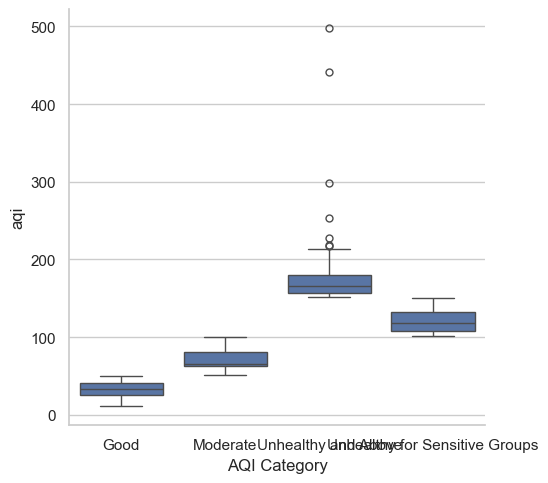

In [44]:
sns.set_theme(font_scale=1)
sns.set_style('whitegrid')
sns.catplot(x='AQI Category', y='aqi', data=hanoi_df, kind='box')
plt.show()

In [45]:
def aqi_graph_over_time(df, name, start_time=None, end_time=None):
    if start_time and end_time:
        df = df[(df['date'] >= start_time) & (df['date'] <= end_time)]
    # Tạo biểu đồ
    fig, ax = plt.subplots(figsize=(18, 7))
    ax.plot(df['date'], df['aqi'], marker='o', label='AQI')
    # Đặt tiêu đề và nhãn cho các trục
    ax.set_title(f'Biểu đồ phân bố AQI theo thời gian tại {name}')
    ax.set_xlabel('Ngày')
    ax.set_ylabel('AQI')
    ax.grid(True)
    plt.xticks(rotation=45)
    # Hiển thị biểu đồ
    plt.legend()
    plt.tight_layout()
    plt.show()

In [46]:
def frequency_of_pollutants(df, name, start_time=None, end_time=None):
    plt.figure(figsize=(18, 7))
    if start_time and end_time:
        df = df[(df['date'] >= start_time) & (df['date'] <= end_time)]
    max_pollutants_df = df.loc[:, ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].idxmax(axis=1)
    max_pollutants_counts = max_pollutants_df.value_counts()
    ax = max_pollutants_counts.plot(kind='bar', color='blue')
    plt.title(f'Các chất gây ô nhiễm đạt ngưỡng AQI tại {name}')
    plt.xlabel('Chất ô nhiễm')
    plt.ylabel('Tần số')
    for i, count in enumerate(max_pollutants_counts):
        ax.text(i, count + 0.1, str(count), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

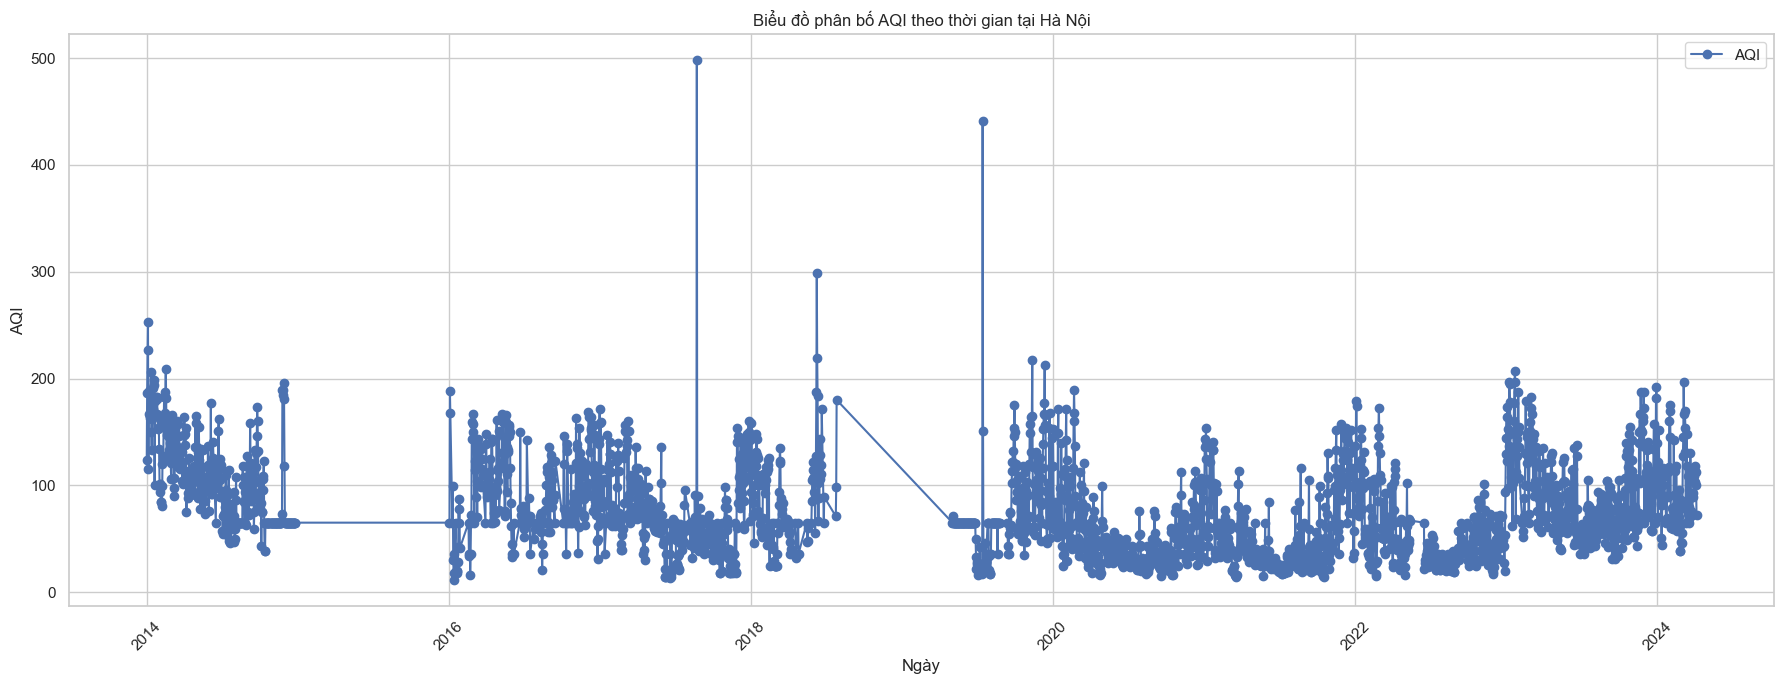

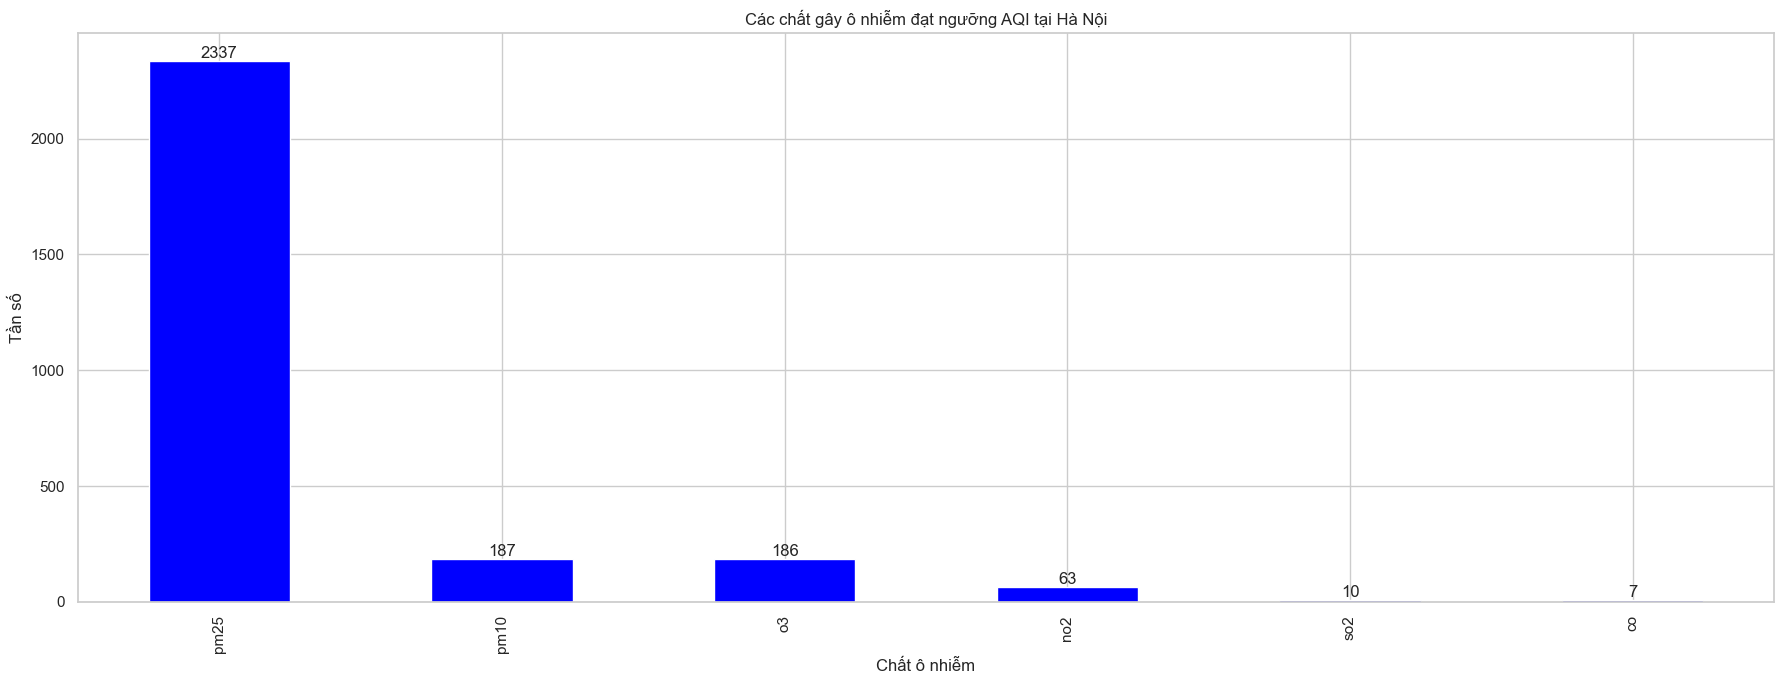

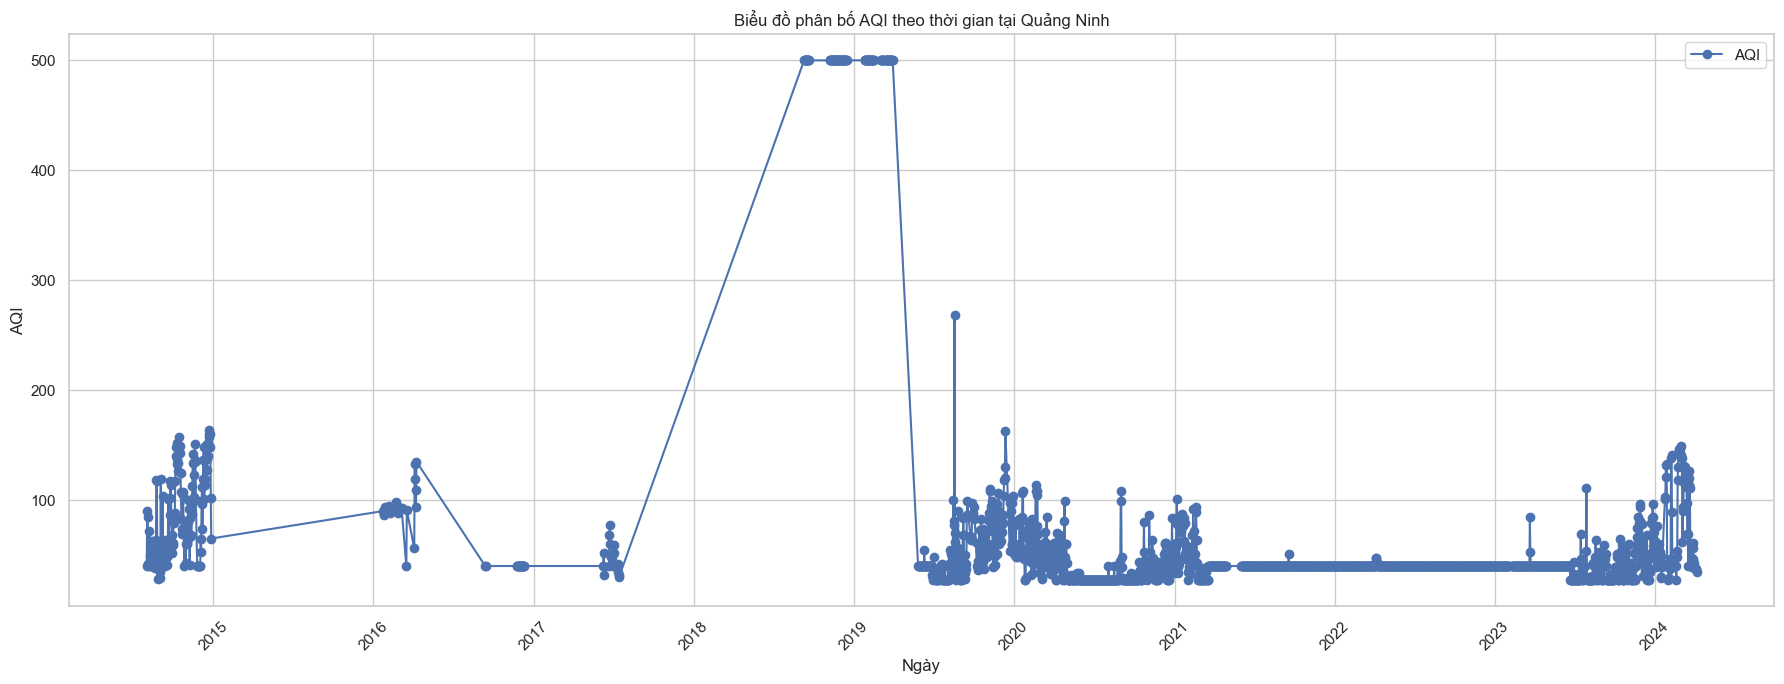

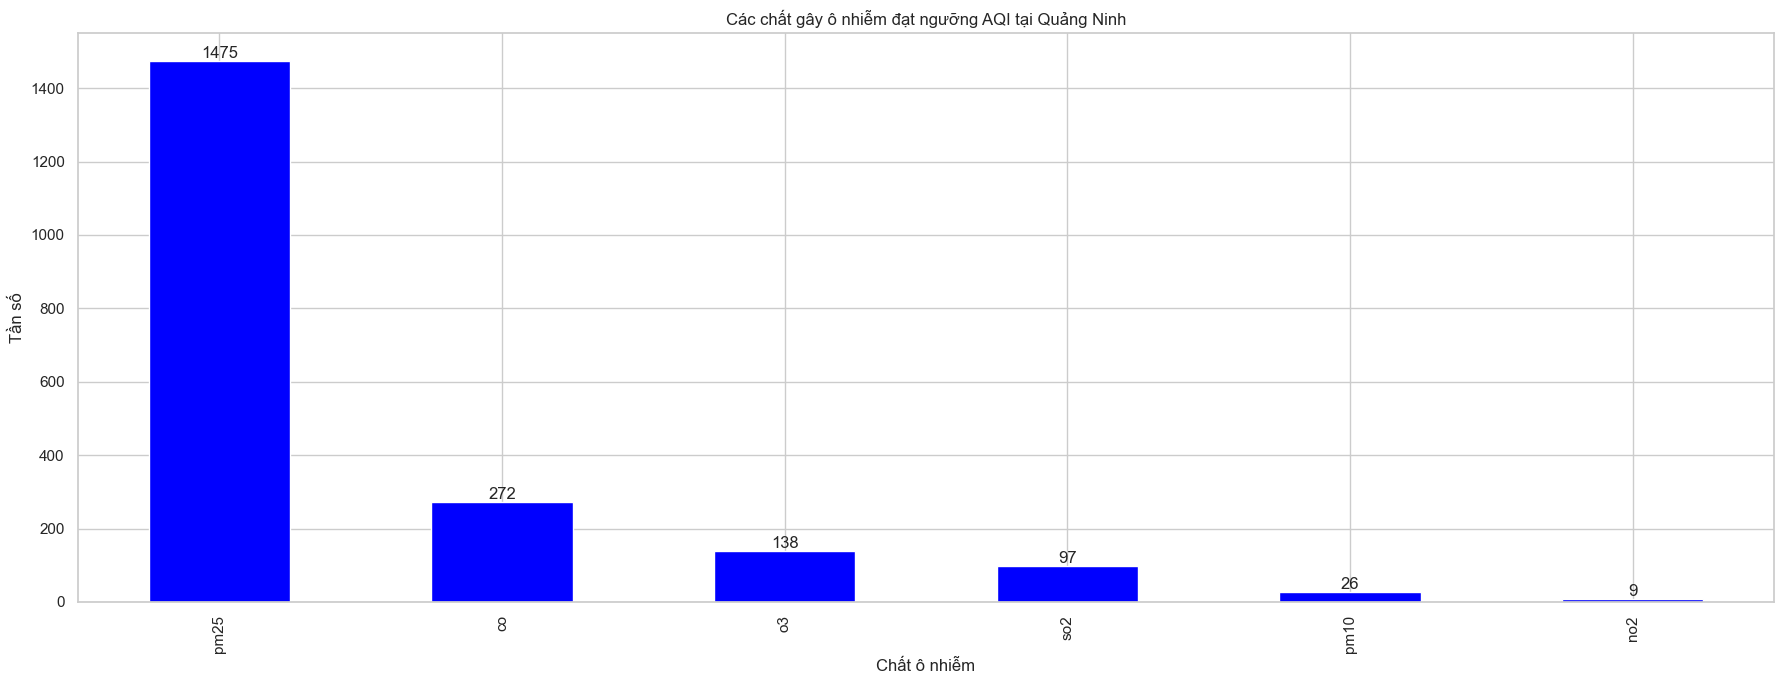

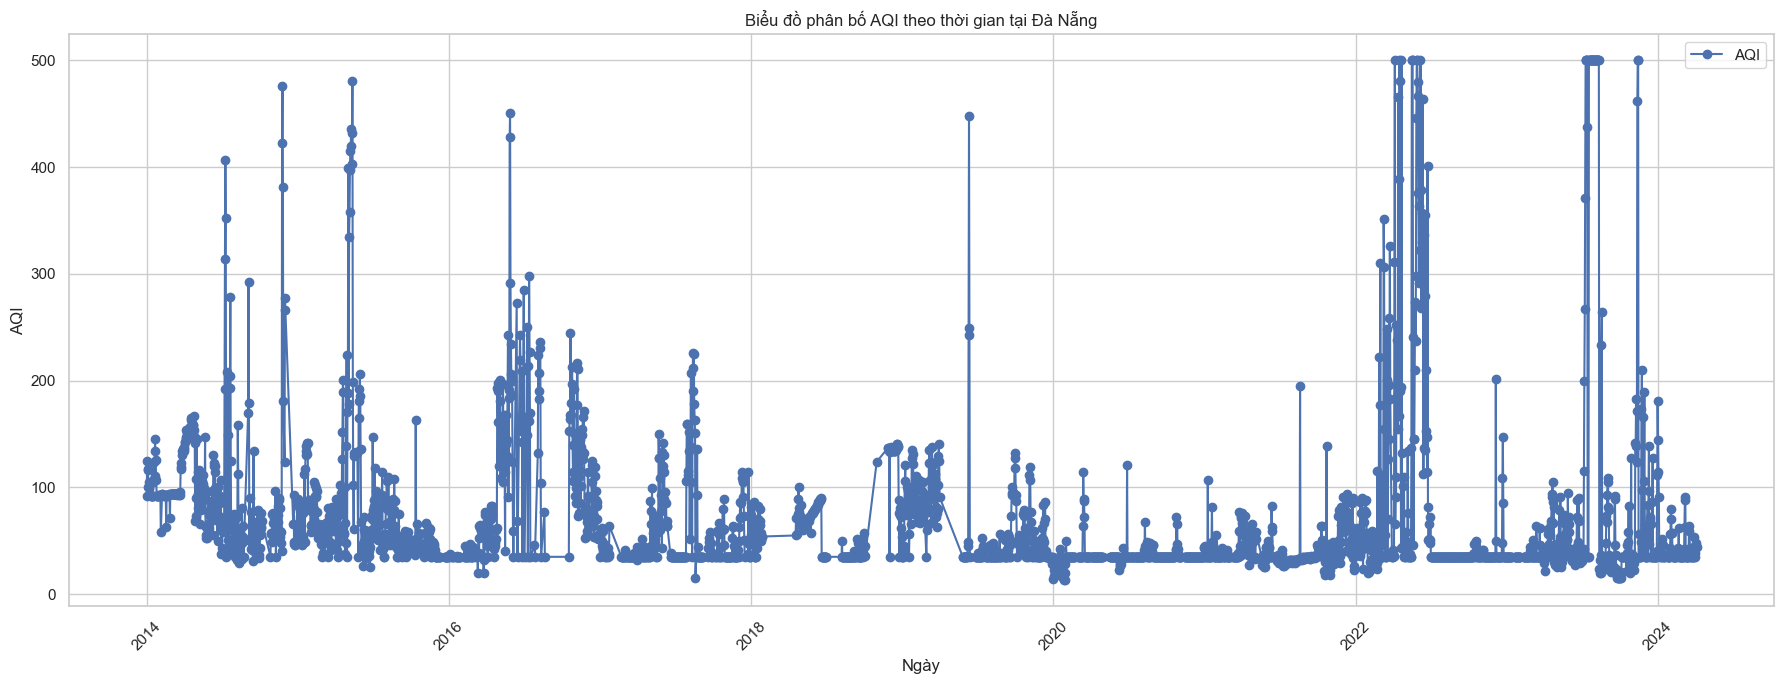

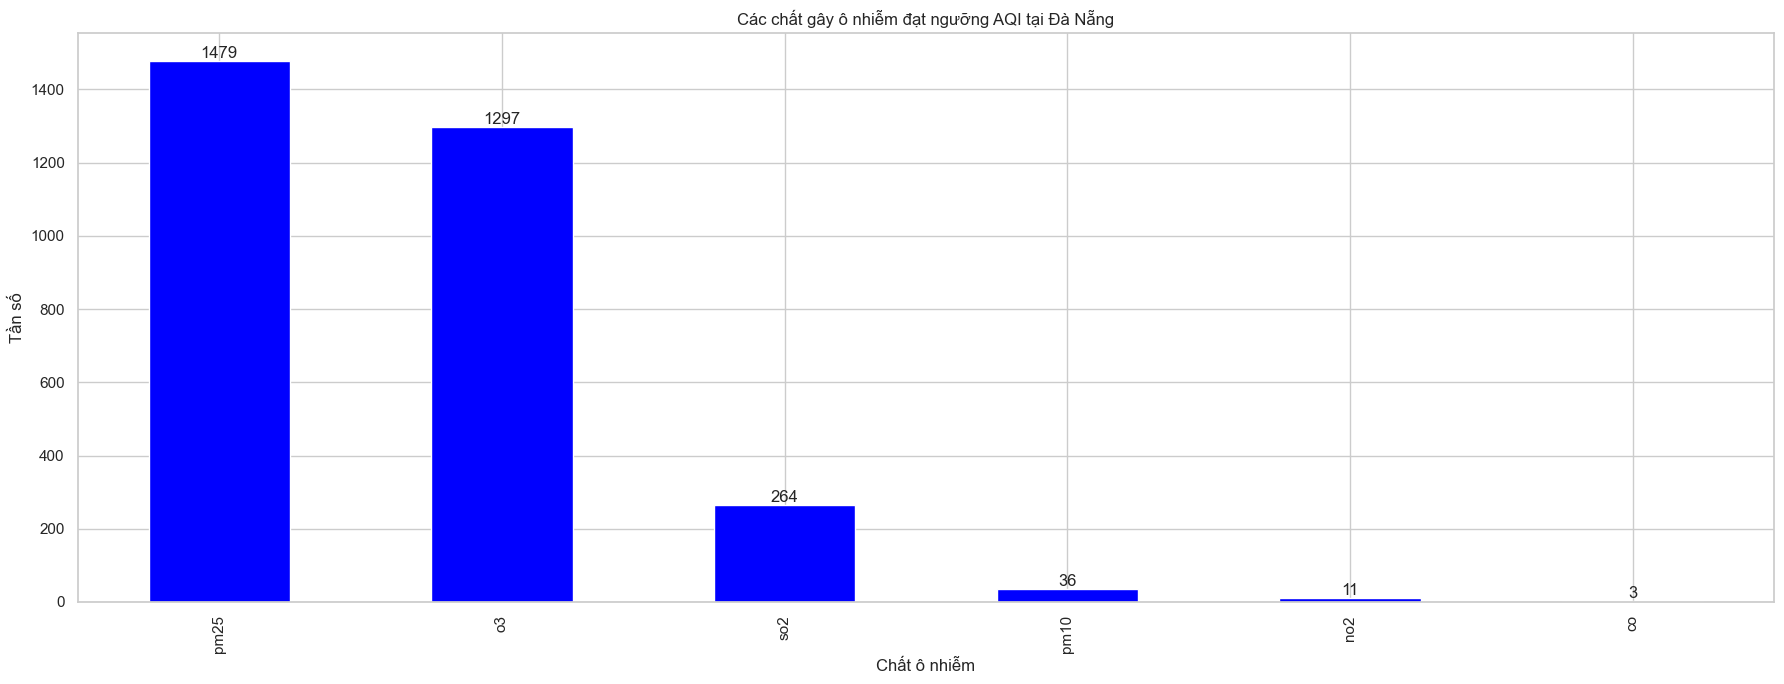

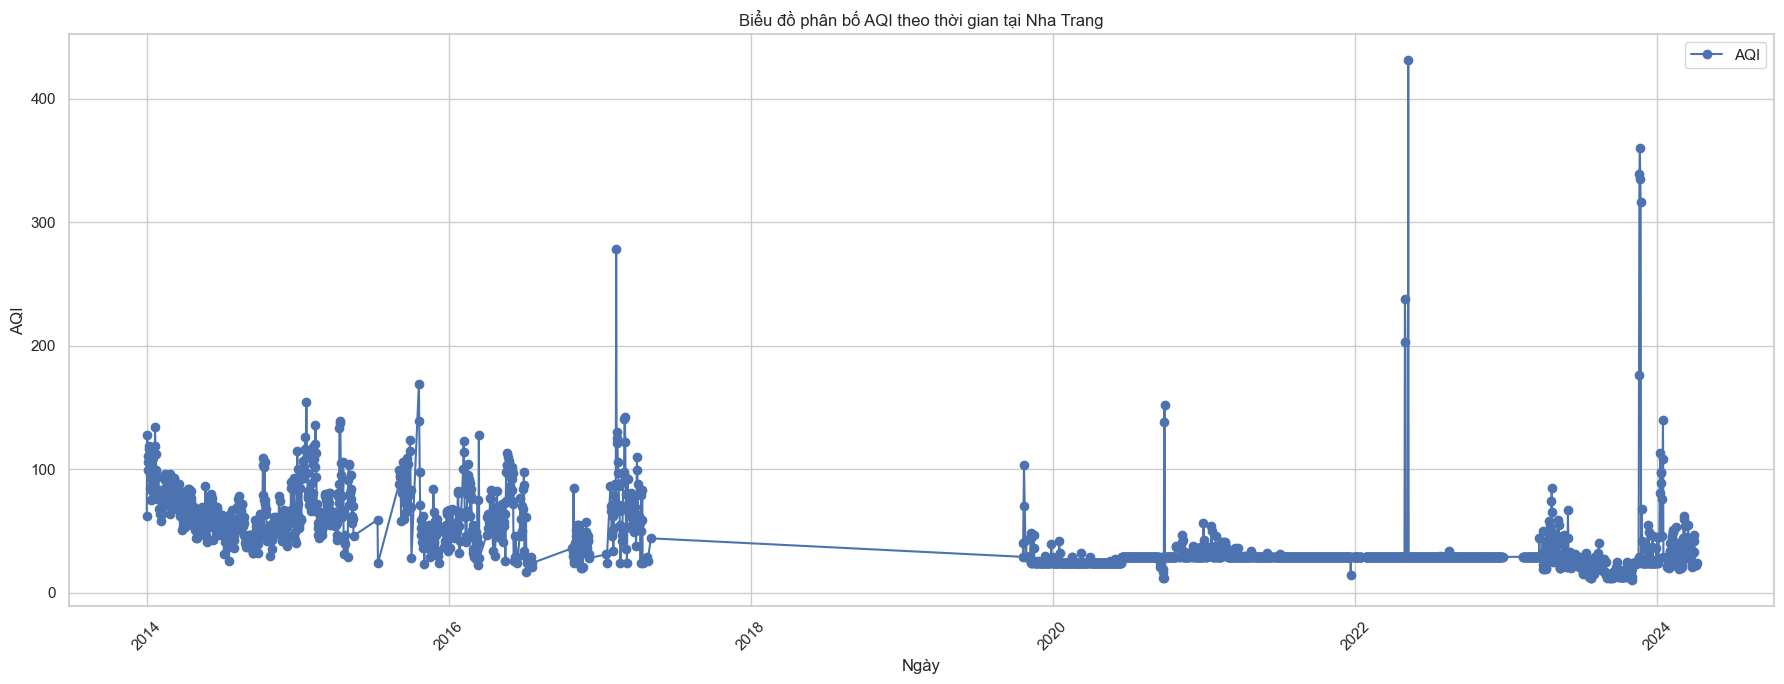

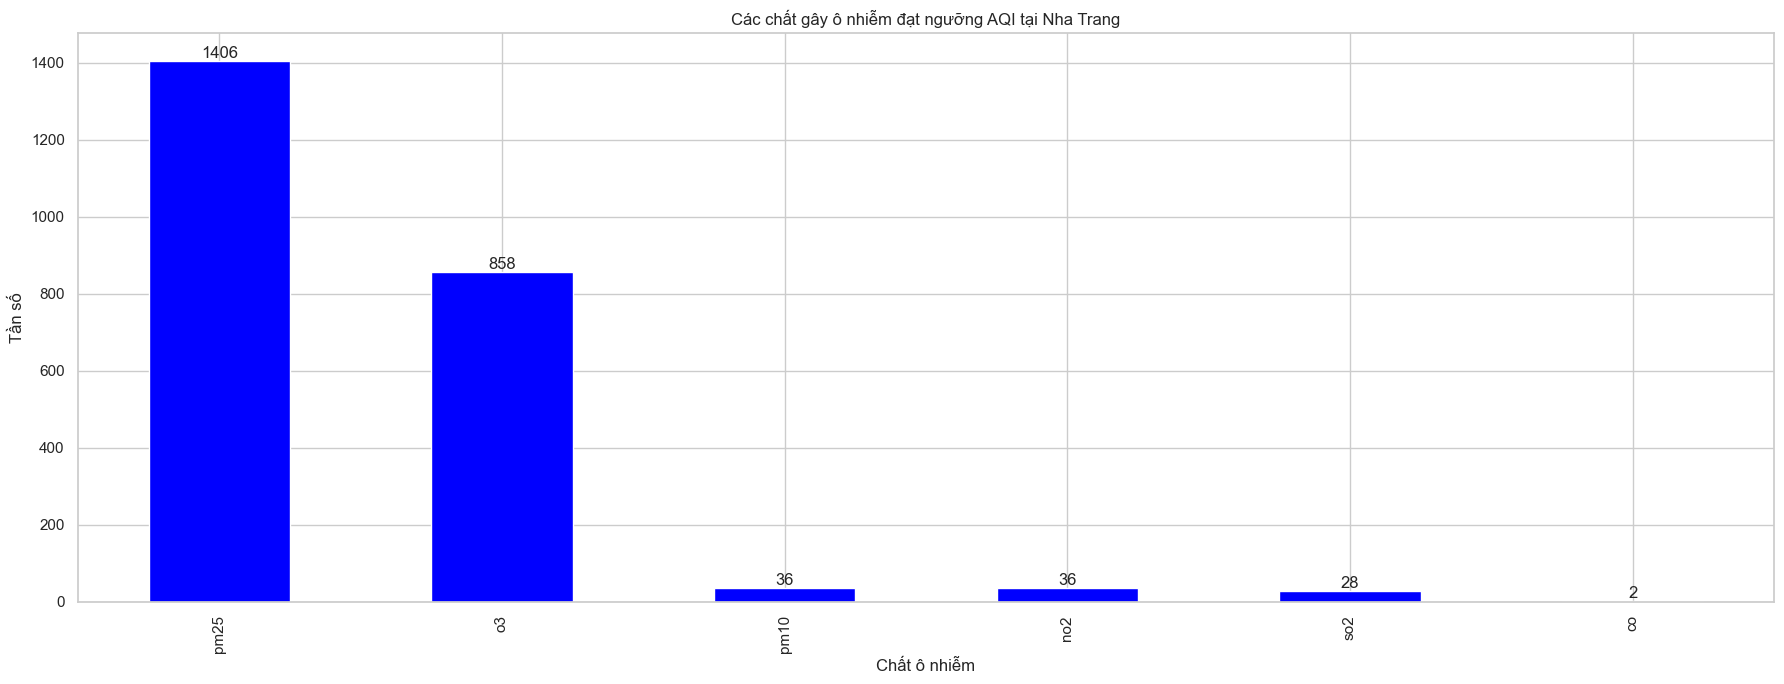

In [47]:
# Nhìn biểu đồ phân tích tần suất chỉ số AQI
# ....

aqi_graph_over_time(hanoi_df, 'Hà Nội')
frequency_of_pollutants(hanoi_df, 'Hà Nội')

aqi_graph_over_time(quang_ninh_df, 'Quảng Ninh')
frequency_of_pollutants(quang_ninh_df, 'Quảng Ninh')

aqi_graph_over_time(da_nang_df, 'Đà Nẵng')
frequency_of_pollutants(da_nang_df, 'Đà Nẵng')

aqi_graph_over_time(nha_trang_df, 'Nha Trang')
frequency_of_pollutants(nha_trang_df, 'Nha Trang')

# Từ các biểu đồ sau phân tích 

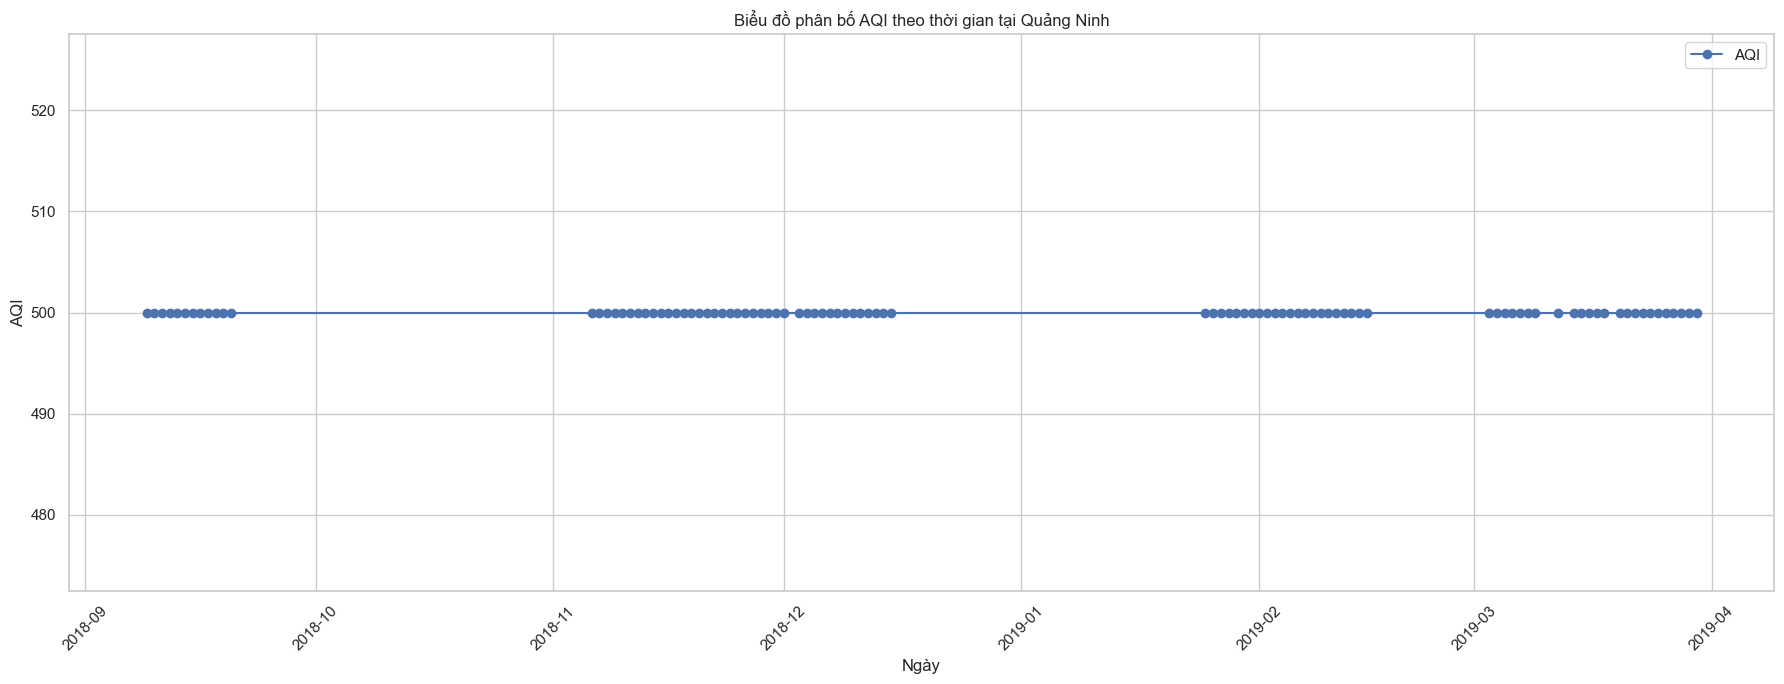

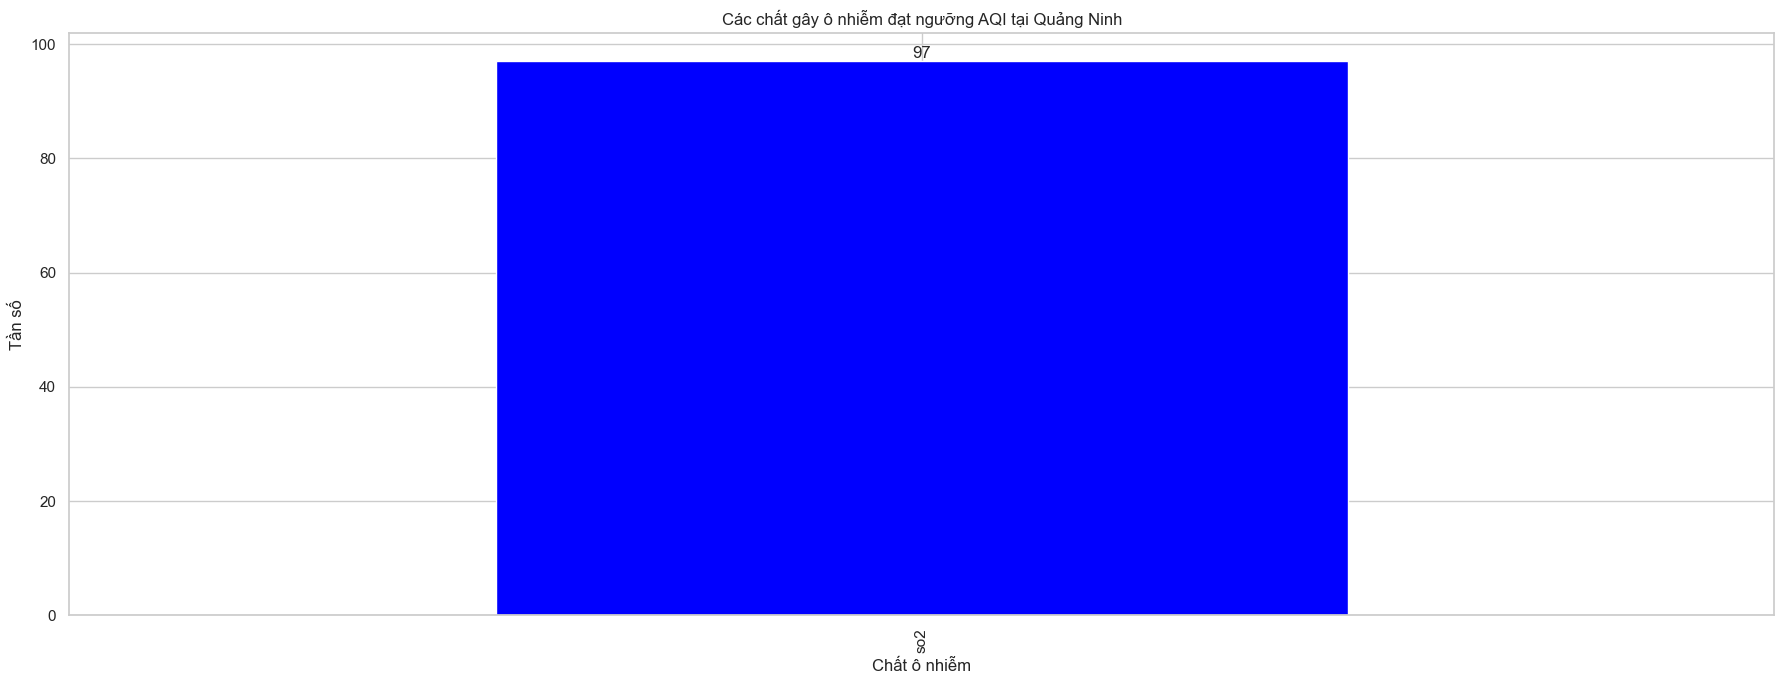

In [48]:
# Thấy khoảng giữa năm 2018 đến giữa 2019 mức AQI liên tục đạt ngưỡng 500 tại Quảng Ninh
aqi_graph_over_time(quang_ninh_df, 'Quảng Ninh', start_time="2018-01-01", end_time="2019-05-01") 
frequency_of_pollutants(quang_ninh_df, 'Quảng Ninh', start_time="2018-01-01", end_time="2019-05-01") 

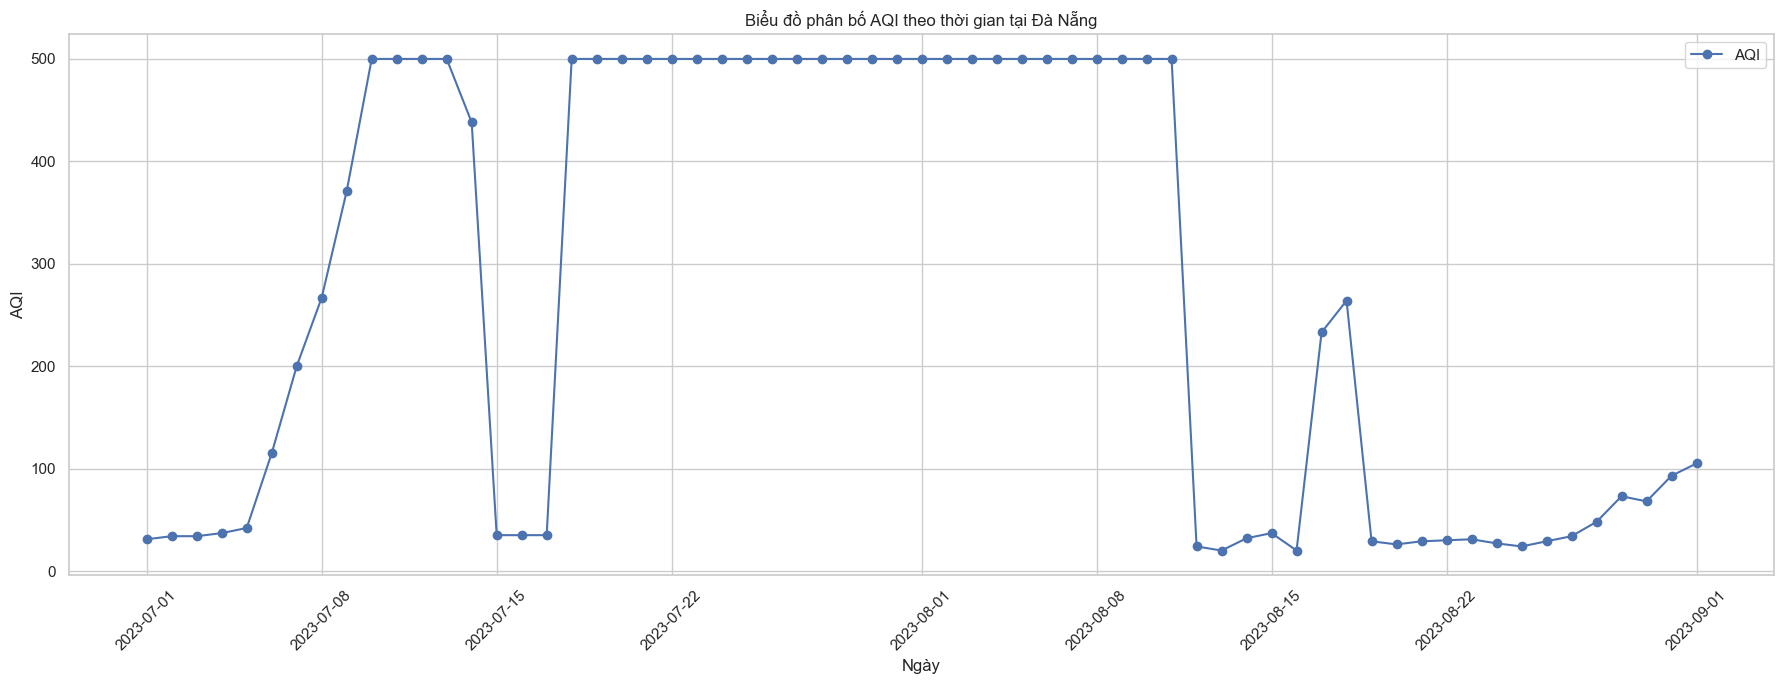

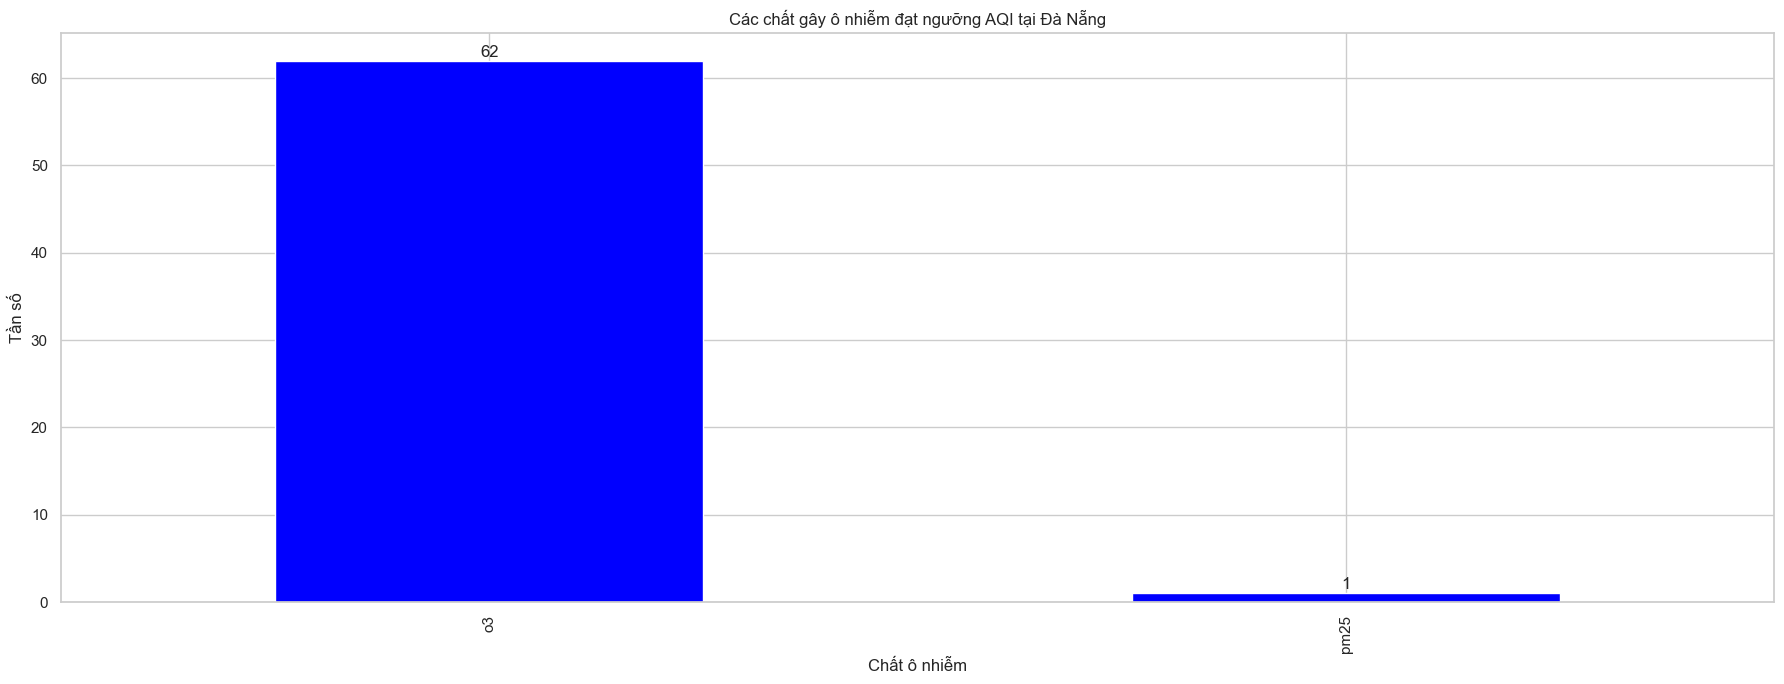

In [49]:
# Thấy khoảng giữa năm 2022 đến giữa 2024 mức AQI liên tục đạt ngưỡng cao tại Đà Nẵng
aqi_graph_over_time(da_nang_df, 'Đà Nẵng', start_time="2023-07-01", end_time="2023-09-01") 
frequency_of_pollutants(da_nang_df, 'Đà Nẵng', start_time="2023-07-01", end_time="2023-09-01") 

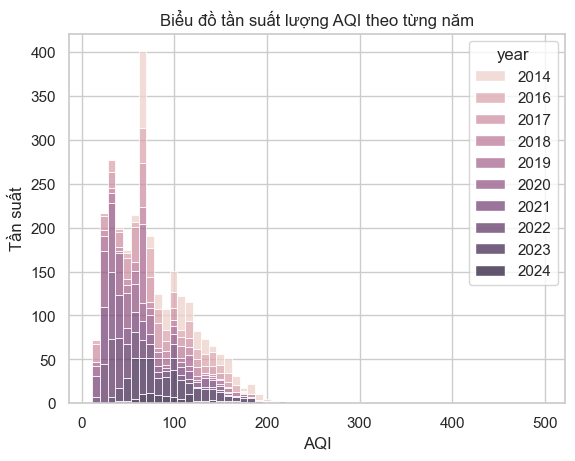

In [50]:
# Thêm cột 'year' dựa trên cột 'date'
hanoi_df['year'] = hanoi_df['date'].dt.year

# Vẽ biểu đồ tần suất lượng AQI theo từng năm
sns.histplot(data=hanoi_df, x='aqi', hue='year', multiple='stack', kde=False)

# Đặt tiêu đề và nhãn
plt.title("Biểu đồ tần suất lượng AQI theo từng năm")
plt.xlabel("AQI")
plt.ylabel("Tần suất")
plt.show()

In [51]:
def median_aqi_chart(df, name):
    # Tạo cột 'year' để trích xuất năm từ cột 'date'
    df['year'] = df['date'].dt.year

    # Tính giá trị trung vị (median) của chỉ số AQI theo từng năm
    aqi_median_per_year = df.groupby('year')['aqi'].median()

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    aqi_median_per_year.plot(kind='bar', color='skyblue')  # Biểu đồ cột
    plt.title(f'Giá trị Trung Vị (Median) AQI của {name} theo Từng Năm')
    plt.xlabel('Năm')
    plt.ylabel('Median AQI')
    plt.show()

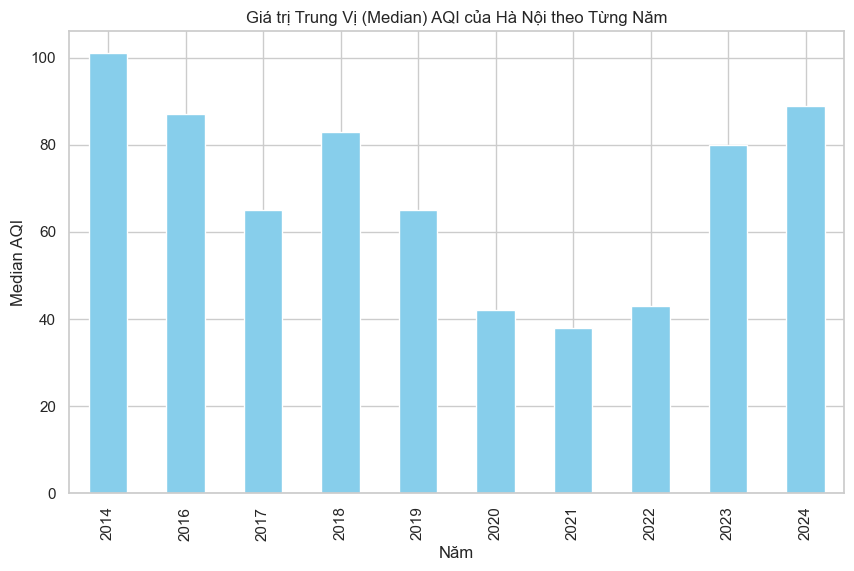

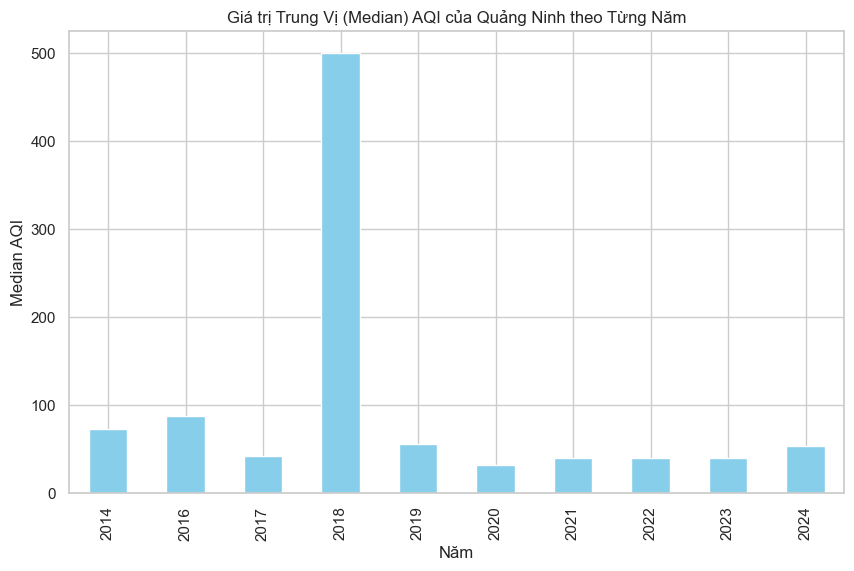

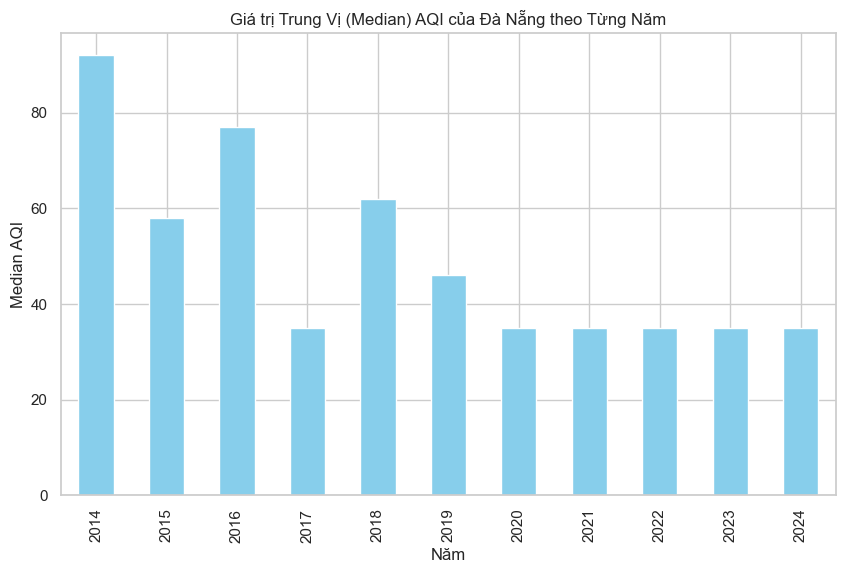

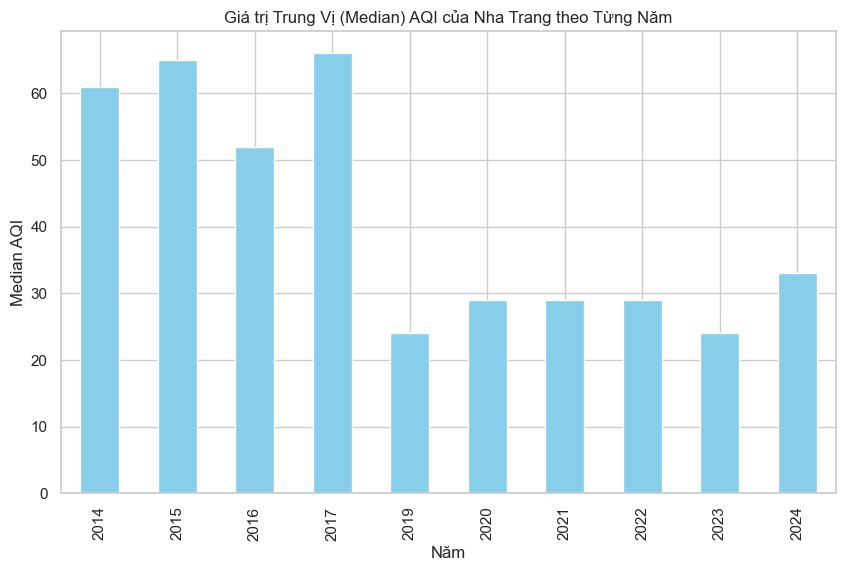

In [52]:
median_aqi_chart(hanoi_df, "Hà Nội")
median_aqi_chart(quang_ninh_df, "Quảng Ninh")
median_aqi_chart(da_nang_df, "Đà Nẵng")
median_aqi_chart(nha_trang_df, "Nha Trang")

In [53]:
def mean_aqi_chart(df, name):
    # Tạo cột 'year' để trích xuất năm từ cột 'date'
    df['year'] = df['date'].dt.year

    # Tính giá trị trung vị (median) của chỉ số AQI theo từng năm
    aqi_mean_per_year = df.groupby('year')['aqi'].mean()

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    aqi_mean_per_year.plot(kind='bar', color='skyblue')  # Biểu đồ cột
    plt.title(f'Giá trị Trung Vị (Mean) AQI của {name} theo Từng Năm')
    plt.xlabel('Năm')
    plt.ylabel('Mean AQI')
    plt.show()

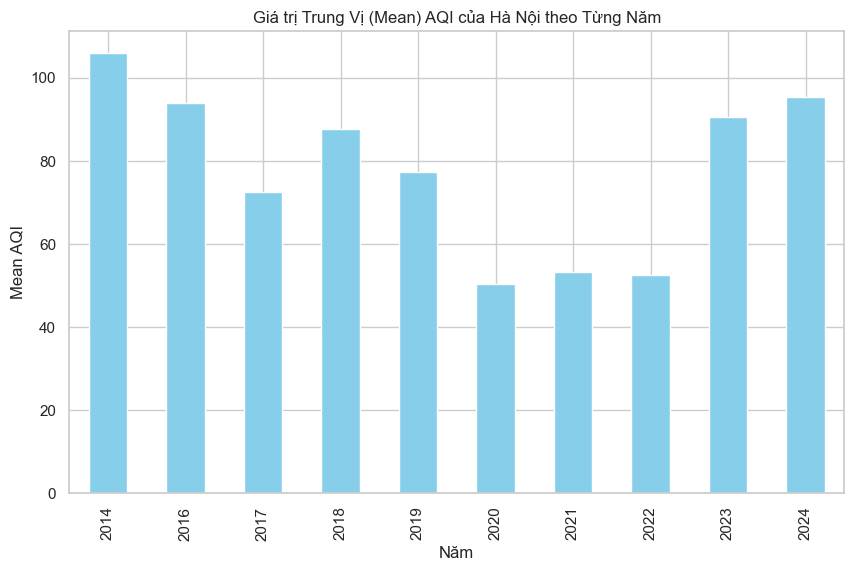

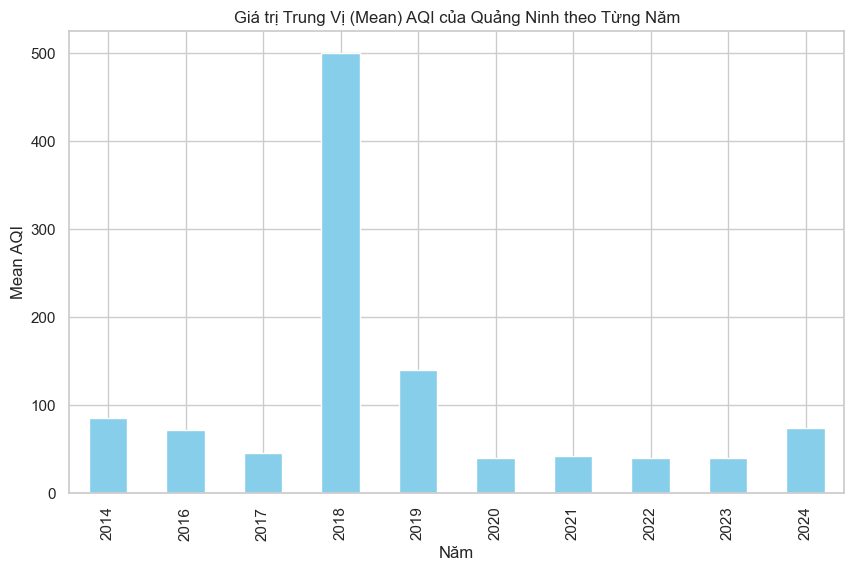

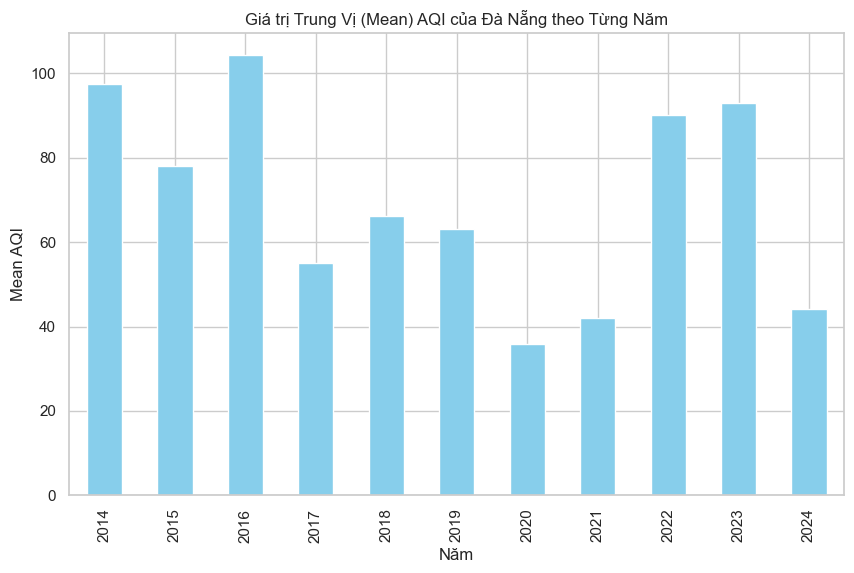

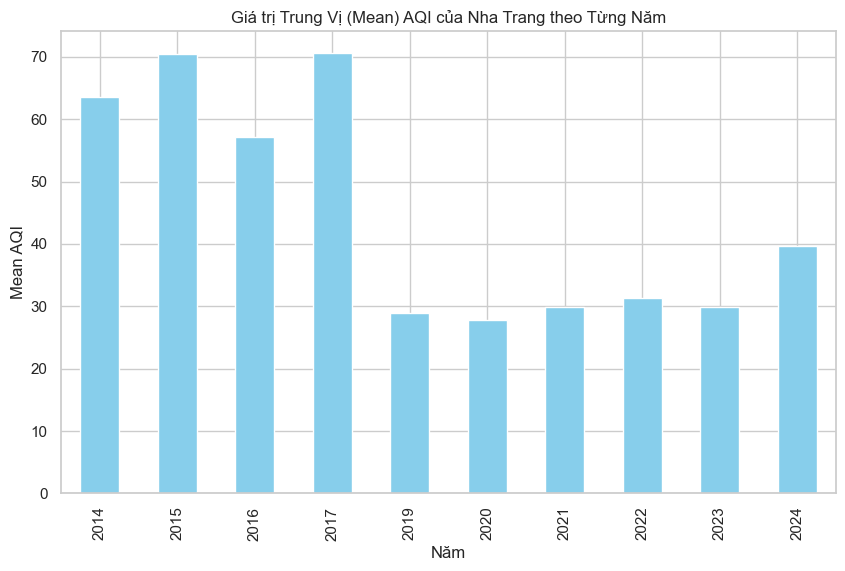

In [54]:
mean_aqi_chart(hanoi_df, "Hà Nội")
mean_aqi_chart(quang_ninh_df, "Quảng Ninh")
mean_aqi_chart(da_nang_df, "Đà Nẵng")
mean_aqi_chart(nha_trang_df, "Nha Trang")

In [55]:
# Tạo một DataFrame mới chỉ chứa các chỉ số độc hại có giá trị lớn nhất
max_pollutants_df = hanoi_df.loc[:, ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].idxmax(axis=1)

# Đếm số lượng các chỉ số độc hại tạo ra AQI
max_pollutants_counts = max_pollutants_df.value_counts()
max_pollutants_counts

pm25    2337
pm10     187
o3       186
no2       63
so2       10
co         7
Name: count, dtype: int64

In [56]:
# Tạo hàm vẽ biểu đồ Pie để thể hiện sự phân bố của AQI Categories
def pie_chart_aqi_categories(df, name):
    aqi_categories_real = df['AQI Category'].unique()
    aqi_category_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy and Above']
    aqi_category_order = [cat for cat in aqi_category_order if cat in aqi_categories_real]

    aqi_categories = df['AQI Category'].value_counts()
    sorted_aqi_categories = aqi_categories.reindex(aqi_category_order, fill_value=0)

    # Vẽ biểu đồ tròn
    plt.figure(figsize=(8, 8))
    plt.pie(sorted_aqi_categories, labels=[f"{cat} ({sorted_aqi_categories[cat] / sorted_aqi_categories.sum() * 100:.1f}%)"
                                                    for cat in sorted_aqi_categories.index], startangle=90)

    # Đặt tiêu đề cho biểu đồ
    plt.title(f'Phân bổ danh mục AQI tại {name}')

    # Thêm chú thích
    plt.legend(title="Danh mục AQI", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

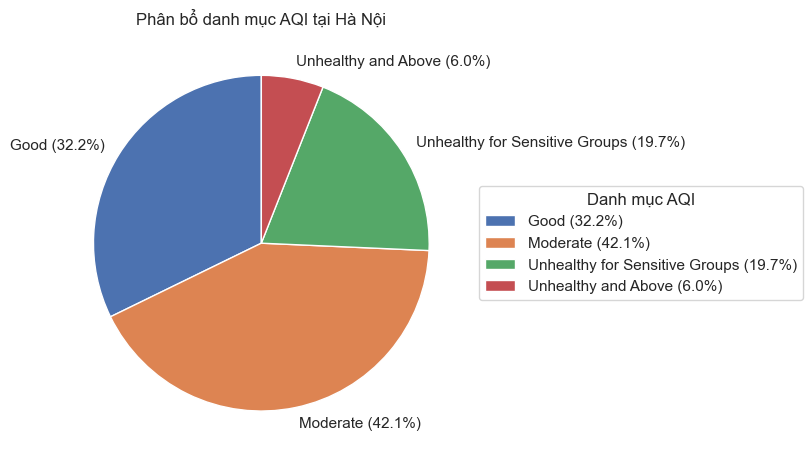

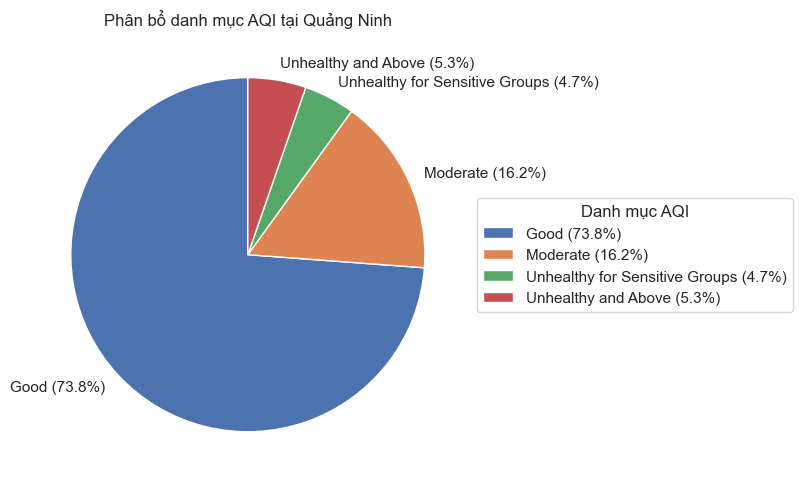

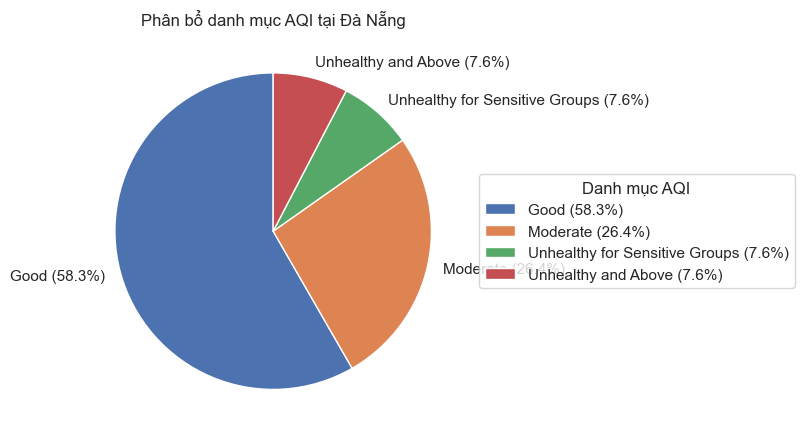

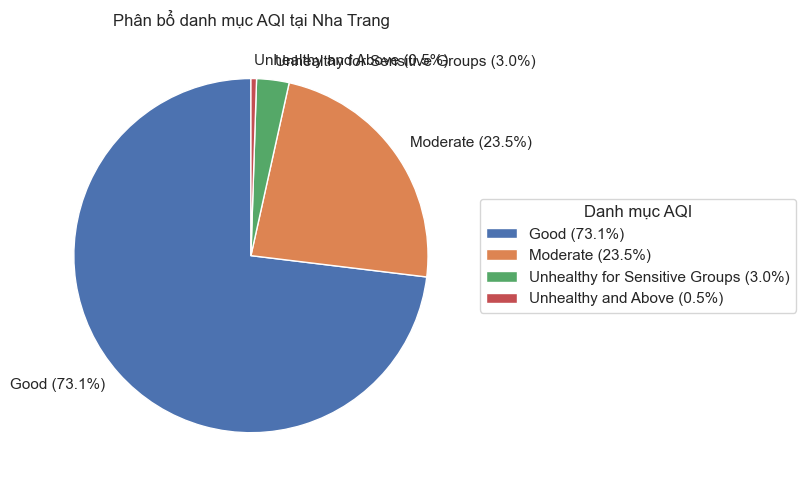

In [57]:
pie_chart_aqi_categories(hanoi_df, 'Hà Nội')
pie_chart_aqi_categories(quang_ninh_df, 'Quảng Ninh')
pie_chart_aqi_categories(da_nang_df, 'Đà Nẵng')
pie_chart_aqi_categories(nha_trang_df, 'Nha Trang')

## Đào tạo và kiểm thử các mô hình Machine Learning Classifier

In [58]:
# Tạo hàm chuyển đổi các AQI Categories sang dạng số để phục vụ train Model
def convert_categories_to_number(df):
    aqi_category_mapping = {
        'Good': 0,
        'Moderate': 1,
        'Unhealthy for Sensitive Groups': 2,
        'Unhealthy and Above': 3,
    }

    # Chuyển đổi các giá trị của cột 'AQI Category' sang số
    df['AQI Category'] = df['AQI Category'].apply(lambda x: aqi_category_mapping.get(x, -1))

In [59]:
convert_categories_to_number(hanoi_df)
convert_categories_to_number(quang_ninh_df)
convert_categories_to_number(da_nang_df)
convert_categories_to_number(nha_trang_df)

In [60]:
hanoi_df['AQI Category'].value_counts()

AQI Category
1    1174
0     899
2     550
3     167
Name: count, dtype: int64

In [61]:
da_nang_df['AQI Category'].value_counts()

AQI Category
0    1802
1     817
3     236
2     235
Name: count, dtype: int64

In [62]:
quang_ninh_df['AQI Category'].value_counts()

AQI Category
0    1489
1     327
3     107
2      94
Name: count, dtype: int64

In [63]:
nha_trang_df['AQI Category'].value_counts()

AQI Category
0    1729
1     555
2      70
3      12
Name: count, dtype: int64

In [64]:
# Tạo hàm train và đánh giá Model
def train_model(df, model, nameModel):
    # Chia dữ liệu thành features (X) và target (y)
    X = df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]
    y = df['AQI Category']

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Đánh giá mô hình
    print(f"{nameModel} Accuracy Score:", accuracy_score(y_test, y_pred))
    print(f"\n{nameModel} Classification Report:")
    print(classification_report(y_test, y_pred))

    # In confusion matrix để đánh giá hiệu suất của mô hình
    print(f"\n{nameModel} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return accuracy_score(y_test, y_pred)

In [65]:
# Model : Random Forest Classifier
# Khởi tạo Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_accuracy_score = train_model(hanoi_df, rf_model, 'Random Forest')

Random Forest Accuracy Score: 0.996415770609319

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       1.00      1.00      1.00       228
           2       1.00      0.99      1.00       117
           3       1.00      1.00      1.00        32

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558


Random Forest Confusion Matrix:
[[181   0   0   0]
 [  1 227   0   0]
 [  0   1 116   0]
 [  0   0   0  32]]


In [66]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = hanoi_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]
y = hanoi_df['AQI Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Sử dụng Random Forest với tham số class_weight='balanced'
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá hiệu suất mô hình
print("RandomForestClassifier Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

RandomForestClassifier Accuracy Score: 0.989247311827957
Confusion Matrix:
[[180   0   0   0]
 [  1 234   0   0]
 [  0   3 107   0]
 [  1   1   0  31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       180
           1       0.98      1.00      0.99       235
           2       1.00      0.97      0.99       110
           3       1.00      0.94      0.97        33

    accuracy                           0.99       558
   macro avg       0.99      0.98      0.98       558
weighted avg       0.99      0.99      0.99       558



In [67]:
# Chia dữ liệu thành X (đặc điểm) và y (nhãn mục tiêu)
X = hanoi_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]
y = hanoi_df['AQI Category']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
k_neighbors = math.ceil(sum(y_train) * 0.01)
print(k_neighbors)

# Áp dụng SMOTE để cân bằng tập huấn luyện
smote = SMOTE(random_state=101, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra phân phối sau khi áp dụng SMOTE
print("Phân phối sau khi SMOTE:", Counter(y_train_resampled))

# Huấn luyện RandomForestClassifier
clf = RandomForestClassifier(random_state=1011)
clf.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá hiệu suất mô hình
print("RandomForestClassifier Accuracy Score with SMOTE:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

23
Phân phối sau khi SMOTE: Counter({0: 946, 2: 946, 1: 946, 3: 946})
RandomForestClassifier Accuracy Score with SMOTE: 0.985663082437276
Confusion Matrix:
[[188   0   0   0]
 [  2 224   2   0]
 [  0   1 111   1]
 [  0   0   2  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       188
           1       1.00      0.98      0.99       228
           2       0.97      0.98      0.97       113
           3       0.96      0.93      0.95        29

    accuracy                           0.99       558
   macro avg       0.98      0.97      0.98       558
weighted avg       0.99      0.99      0.99       558



In [68]:
# Chia dữ liệu thành X (đặc điểm) và y (nhãn mục tiêu)

X = hanoi_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]
y = hanoi_df['AQI Category']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
k_neighbors = math.ceil(sum(y_train) * 0.01)
m_neighbors = math.ceil(sum(y_train) * 0.01)

# Áp dụng BorderlineSMOTE để cân bằng tập huấn luyện
borderline_smote = BorderlineSMOTE(random_state=11, k_neighbors=k_neighbors, m_neighbors=m_neighbors)  # Sử dụng BorderlineSMOTE
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

# Kiểm tra phân phối sau khi áp dụng BorderlineSMOTE
print("Phân phối sau khi BorderlineSMOTE:", Counter(y_train_resampled))

# Huấn luyện RandomForestClassifier
clf = RandomForestClassifier(random_state=11)
clf.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá hiệu suất mô hình
print("RandomForestClassifier Accuracy Score with BorderlineSMOTE:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Phân phối sau khi BorderlineSMOTE: Counter({2: 948, 0: 948, 1: 948, 3: 948})
RandomForestClassifier Accuracy Score with BorderlineSMOTE: 0.996415770609319
Confusion Matrix:
[[190   0   0   0]
 [  0 225   1   0]
 [  0   0 102   1]
 [  0   0   0  39]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       226
           2       0.99      0.99      0.99       103
           3       0.97      1.00      0.99        39

    accuracy                           1.00       558
   macro avg       0.99      1.00      0.99       558
weighted avg       1.00      1.00      1.00       558



In [69]:
# Model : Random Forest Classifier
# Khởi tạo Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_accuracy_score = train_model(da_nang_df, rf_model, 'Random Forest')

Random Forest Accuracy Score: 0.9935275080906149

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       0.99      1.00      1.00       176
           2       0.95      0.95      0.95        37
           3       0.97      0.95      0.96        39

    accuracy                           0.99       618
   macro avg       0.98      0.97      0.98       618
weighted avg       0.99      0.99      0.99       618


Random Forest Confusion Matrix:
[[366   0   0   0]
 [  0 176   0   0]
 [  0   1  35   1]
 [  0   0   2  37]]


In [70]:
train_model(quang_ninh_df, rf_model, 'Random Forest')

Random Forest Accuracy Score: 0.9900990099009901

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       302
           1       0.98      0.97      0.98        67
           2       0.95      0.95      0.95        21
           3       1.00      0.93      0.96        14

    accuracy                           0.99       404
   macro avg       0.98      0.96      0.97       404
weighted avg       0.99      0.99      0.99       404


Random Forest Confusion Matrix:
[[302   0   0   0]
 [  2  65   0   0]
 [  0   1  20   0]
 [  0   0   1  13]]


0.9900990099009901

In [71]:
train_model(da_nang_df, rf_model, 'Random Forest')

Random Forest Accuracy Score: 0.9935275080906149

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       0.99      1.00      1.00       176
           2       0.95      0.95      0.95        37
           3       0.97      0.95      0.96        39

    accuracy                           0.99       618
   macro avg       0.98      0.97      0.98       618
weighted avg       0.99      0.99      0.99       618


Random Forest Confusion Matrix:
[[366   0   0   0]
 [  0 176   0   0]
 [  0   1  35   1]
 [  0   0   2  37]]


0.9935275080906149

In [72]:
train_model(nha_trang_df, rf_model, 'Random Forest')

Random Forest Accuracy Score: 0.9936708860759493

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       0.99      1.00      1.00       104
           2       0.87      0.93      0.90        14
           3       0.00      0.00      0.00         2

    accuracy                           0.99       474
   macro avg       0.71      0.73      0.72       474
weighted avg       0.99      0.99      0.99       474


Random Forest Confusion Matrix:
[[354   0   0   0]
 [  0 104   0   0]
 [  0   1  13   0]
 [  0   0   2   0]]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

0.9936708860759493

In [73]:
# Model : KNeighbors Classifier
# Khởi tạo Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_accuracy_score = train_model(hanoi_df, knn_model, 'KNeighbors')
# train_model(quang_ninh_df, knn_model, 'KNeighbors')
# train_model(da_nang_df, knn_model, 'KNeighbors')
# train_model(nha_trang_df, knn_model, 'KNeighbors')

KNeighbors Accuracy Score: 0.9408602150537635

KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       181
           1       0.95      0.96      0.96       228
           2       0.91      0.88      0.90       117
           3       0.79      0.81      0.80        32

    accuracy                           0.94       558
   macro avg       0.91      0.91      0.91       558
weighted avg       0.94      0.94      0.94       558


KNeighbors Confusion Matrix:
[[176   5   0   0]
 [  4 220   4   0]
 [  0   7 103   7]
 [  0   0   6  26]]


In [74]:
# Model : XGBoost Classifier
# Khởi tạo Model
xgb_model = XGBClassifier(random_state=42)
xgb_accuracy_score = train_model(hanoi_df, xgb_model, 'XGBoost')
# train_model(quang_ninh_df, xgb_model, 'XGBoost')
# train_model(da_nang_df, xgb_model, 'XGBoost')
# train_model(nha_trang_df, xgb_model, 'XGBoost')

XGBoost Accuracy Score: 0.996415770609319

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       1.00      0.99      1.00       228
           2       0.99      1.00      1.00       117
           3       1.00      1.00      1.00        32

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558


XGBoost Confusion Matrix:
[[181   0   0   0]
 [  1 226   1   0]
 [  0   0 117   0]
 [  0   0   0  32]]


In [75]:
# Model : XGBoost Classifier
# Khởi tạo Model
xgb_model = XGBClassifier(random_state=42)
xgb_accuracy_score = train_model(da_nang_df, xgb_model, 'XGBoost')

XGBoost Accuracy Score: 0.9935275080906149

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       0.98      0.99      0.99       176
           2       1.00      0.92      0.96        37
           3       1.00      1.00      1.00        39

    accuracy                           0.99       618
   macro avg       1.00      0.98      0.99       618
weighted avg       0.99      0.99      0.99       618


XGBoost Confusion Matrix:
[[366   0   0   0]
 [  1 175   0   0]
 [  0   3  34   0]
 [  0   0   0  39]]


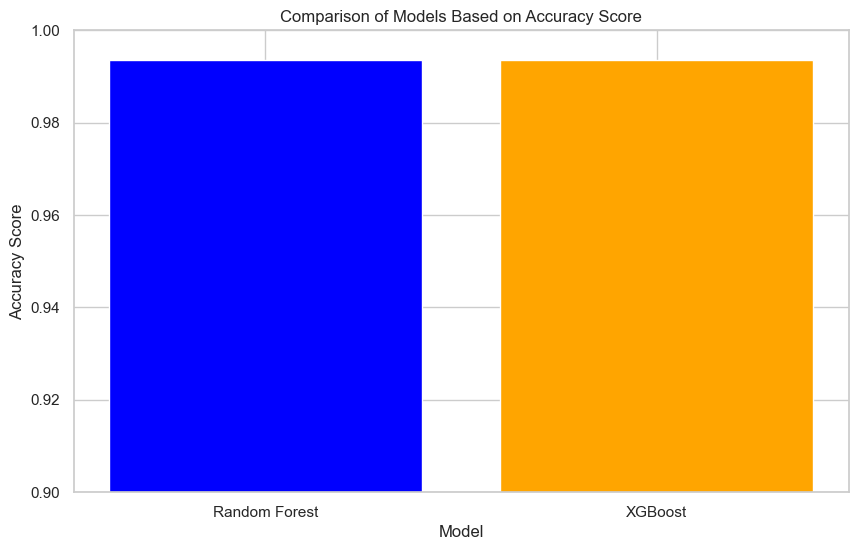

In [76]:
import matplotlib.pyplot as plt

# Các tên của các mô hình
models = ['Random Forest', 'XGBoost']

# Accuracy Score tương ứng của các mô hình khi train DataFrame hanoi_df
accuracy_scores = [rf_accuracy_score, xgb_accuracy_score]  # Thay thế các giá trị này bằng kết quả accuracy score của mô hình của bạn

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Models Based on Accuracy Score')
plt.ylim(0.9, 1)  # Đặt giới hạn trục y từ 0.9 đến 1 để dễ nhìn
plt.show()
